# Przygotowanie

## Parametryzacja  jupytera

In [222]:
# change code cells width
from IPython.display import display, HTML
display(
HTML(data = """
<style>
  div#notebook-container {width: 75%;}
  div#menubar-container {width: 65%;}
  div#maintoolbar-container {width: 55%;}
</style>

"""))


# display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'



# pandas DataFrame displayed outpu size
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40



## Pakiety i funkcje

In [290]:
# pakiety i funkcje

import os
%run "modules/data_analysis_tools.py"
%run "modules/F_Classification_improved.py"
%run "modules/grid_search.py"



## Zmienne globalne

In [224]:
# lista dostepnych modeli
models_base = {  'rf' :RandomForestClassifier(n_estimators=10, max_depth=6)
                ,'gb' :GradientBoostingClassifier(n_estimators=10, max_depth = 6)
                ,'cat':CatBoostClassifier(iterations=10,  random_seed=123)
                ,'ab' :AdaBoostClassifier(n_estimators = 30)
                ,'knn':skl.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=10, p=2, metric='minkowski')
                ,'nb' :skl.naive_bayes.GaussianNB(priors=None, var_smoothing=1e-09)
                ,'lgbm':LGBMClassifier(n_estimators = 50, n_jobs = 5, learning_rate = 0.1, max_depth = 7)
                ,'xgb':XGBClassifier(n_estimators = 50, leanring_rate = 0.1, max_depth = 7, n_jobs = 5)
                }

# Dane

## Import i podstawowe charakterystyki

In [4]:
data = pd.read_csv('data/diamonds.txt', index_col=False)
data = data.drop(data.columns[0], axis = 1)

h('rozmiar danych')
data.shape

h('typy zmiennych')
data.dtypes

h('sktuktura zmiennych')
glimpse_data(data, var_cat = list(data.dtypes[data.dtypes=='object'].index) )

(53940, 12)

carat                 float64
cut                    object
color                  object
clarity                object
depth                 float64
table                 float64
price                   int64
x                     float64
y                     float64
z                     float64
target                  int64
target_multi_label      int64
dtype: object

target  target_multi_label      x      z     price      y  carat  \
NA          0.0                 0.0   0.00   0.00      0.00   0.00   0.00   
NA_proc     0.0                 0.0   0.00   0.00      0.00   0.00   0.00   
min         0.0                 0.0   0.00   0.00    326.00   0.00   0.20   
q_25        0.0                 0.0   4.71   2.91    950.00   4.72   0.40   
q_50        0.0                 1.0   5.70   3.53   2401.00   5.71   0.70   
q_75        1.0                 3.0   6.54   4.04   5324.25   6.54   1.04   
max         1.0                 4.0  10.74  31.80  18823.00  58.90   5.01   

         depth  table                cut      color      clarity  
NA         0.0    0.0                  0          0            0  
NA_proc    0.0    0.0                  0          0            0  
min       43.0   43.0      Ideal (21551)  G (11292)  SI1 (13065)  
q_25      61.0   56.0    Premium (13791)   E (9797)  VS2 (12258)  
q_50      61.8   57.0  Very Good (12082)   F (9542)   SI2 (9194)  
q_75      62.5   59.0        Good (4906)   H (8304)   VS1 (8171)  
max       79.0   95.0        Fair (1610)   D (6775)  VVS2 (5066)

## Bardziej zaawansowane statystyki

In [128]:
var_y = 'target'

gl_result = glimpse_data_extended(  data = data                # dane
                                  , levels_n_limit = 7         # dla zmiennych jakosciowych ile top najczestszych kategorii pokazac
                                  , levels_n_max=35            # DO ilu unilanych kategorii zmienna typu numerycznego jest traktowana jako potencjalna jakosciowa 
                                  , copy_to_clipboard = False) # czy wyniki zapisywac do schowaka (zeby np. szybko skopiowac do excela)

A_F_correlation_selection(data = data, y = var_y, analytical_table_file = gl_result, sheet = None, round = 2)

ratio_not_calculated for cut and target.
ratio_not_calculated for color and target.
ratio_not_calculated for clarity and target.


index      var  nan_proc rec_type      type  n_levels             0  \
0       0    carat       0.0        n   float64       273           NaN   
1       1      cut       0.0        c  category         5  Ideal (40.0)   
2       2    color       0.0        c    object         7      G (20.9)   
3       3  clarity       0.0        c    object         8    SI1 (24.2)   
4       4    depth       0.0        n   float64       184           NaN   
5       5    table       0.0        n   float64       127           NaN   
6       6    price       0.0        n     int64     11602           NaN   
7       7        x       0.0        n   float64       554           NaN   
8       8        y       0.0        n   float64       552           NaN   
9       9        z       0.0        n   float64       375           NaN   
10     10   target       0.0       bn     int64         2    0.0 (65.4)   

                 1                 2           3  ... importance_rand  \
0              NaN               NaN         NaN  ...               0   
1   Premium (25.6)  Very Good (22.4)  Good (9.1)  ...               0   
2         E (18.2)          F (17.7)    H (15.4)  ...               0   
3       VS2 (22.7)        SI2 (17.0)  VS1 (15.1)  ...               0   
4              NaN               NaN         NaN  ...               0   
5              NaN               NaN         NaN  ...               0   
6              NaN               NaN         NaN  ...               0   
7              NaN               NaN         NaN  ...               0   
8              NaN               NaN         NaN  ...               0   
9              NaN               NaN         NaN  ...               0   
10      1.0 (34.6)               NaN         NaN  ...               0   

   importatnce_permut pearson  v_cramer  ratio  kendall  v_cramer_  pearson_  \
0                   0       1         1      1        1        NaN     -0.26   
1                   0       1         1      1        1       0.17       NaN   
2                   0       1         1      1        1       0.15       NaN   
3                   0       1         1      1        1       1.00       NaN   
4                   0       1         1      1        1        NaN     -0.05   
5                   0       1         1      1        1        NaN     -0.12   
6                   0       1         1      1        1        NaN     -0.11   
7                   0       1         1      1        1        NaN     -0.28   
8                   0       1         1      1        1        NaN     -0.27   
9                   0       1         1      1        1        NaN     -0.28   
10                  0       1         1      1        1       1.00      1.00   

    ratio_  kendall_  
0      NaN     -0.24  
1      NaN       NaN  
2      NaN       NaN  
3      NaN       NaN  
4      NaN     -0.06  
5      NaN     -0.11  
6      NaN     -0.13  
7      NaN     -0.23  
8      NaN     -0.23  
9      NaN     -0.23  
10     NaN      1.00  

[11 rows x 32 columns]

# Analiza - pojedyncze zmienne objśniające

## Kategoryczne

In [132]:
var_y = 'target'
var_x = 'cut'

# mozliwosc szybkiego przekodowania zmiennej kategorycznej
new_name = 'cut_new_encoding'
data = categorical_features_recoding(data = data
                                     , var = var_x
                                     , dict_old_new={'Ideal':'0','Premium':'1','Good':'2','Very Good':'3','Fair':'4'} # sloniwk co na co przekodowac
                                     , else_value = None # na jako wartosc przekodowac pozostale kategorie (Jezeli None nie sa rekodowane)
                                     , new_name = new_name # nazwa nowej zmiennej z zrekodowanymi wartosciami
                                    )

h('STATYSTYKI PO KLASACH TARGETU')
cross_tab(  data      = data
          , var_1     = var_y
          , var_2     = var_x
          , round     = 1
          , normalize = 'index')

h('KORELACJA V_CRAMERA Z TARGETEM')
correlation_cramers_v(var_1=data[var_x], var_2=data[var_y], round = 2)


count  percent  c(Fair)  c(Good)  c(Ideal)  c(Premium)  c(Very Good)  \
0  35258     65.4     1345     3715     12097       10086          8015   
1  18682     34.6      265     1191      9454        3705          4067   

   p(Fair)  p(Good)  p(Ideal)  p(Premium)  p(Very Good)  
0      3.8     10.5      34.3        28.6          22.7  
1      1.4      6.4      50.6        19.8          21.8

0.17

## Numeryczne 

min   q_05   q_10   q_25    q_50     q_75    q_90     q_95    max
0  326  544.0  646.0  950.0  2401.0  5324.25  9821.0  13107.1  18823

min_  q_10     q_25    q_50     q_75     q_90   max_
cut                                                            
Fair        337  1114  2050.25  3282.0  5205.50   9133.7  18574
Good        327   603  1145.00  3050.5  5028.00   8736.0  18788
Ideal       326   652   878.00  1810.0  4678.50   9077.0  18806
Premium     326   709  1046.00  3185.0  6296.00  11413.0  18823
Very Good   336   576   912.00  2648.0  5372.75   9680.9  18818

<Figure size 432x288 with 0 Axes>

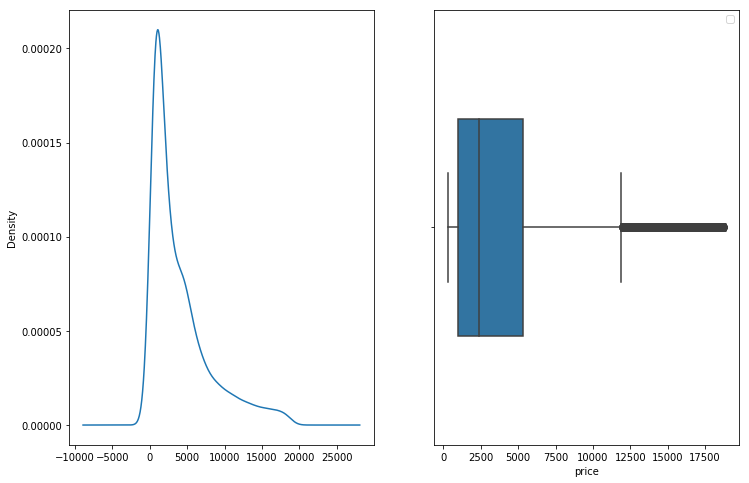

<Figure size 432x288 with 0 Axes>

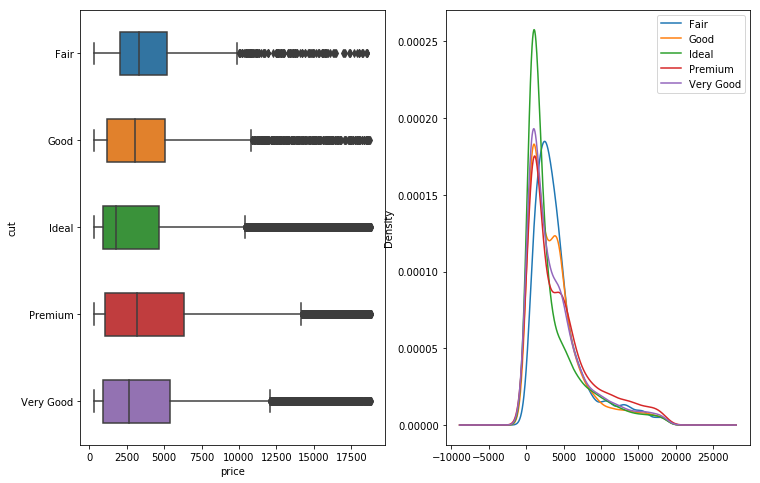

price  target
price    1.00   -0.11
target  -0.11    1.00

In [133]:
var_y = 'target'
var_x = 'price'
var_group = 'cut'

h('STATYSTYKI')
statistics_numeric(  data      = data  # dane
                   , var_x     = var_x   # zmienne
                   , var_group = None  # zmienna gupująca (opcjonalnie)
                   , x_lim     = None  # ograniczenia na wartości zmiennej (np. żeby usunac wartosci odstajace)
                   , round     = 2)    # zaokrlaglenie liczb po przecinku

h('STATYSTYKI GRUPOWANE')
statistics_numeric(  data      = data  # dane
                   , var_x     = var_x   # zmienne
                   , var_group = var_group  # zmienna gupująca (opcjonalnie)
                   , x_lim     = None  # ograniczenia na wartości zmiennej (np. żeby usunac wartosci odstajace)
                   , round     = 2)    # zaokrlaglenie liczb po przecinku

h('ROZKŁAD GESTOŚCI')
# bez grupowanie
plot_density(  data      = data # dane     
             , var_x     = var_x # zmienna grupujaca (opcjonalnie)
             , var_group = None # zmienna
             , bw_method = 0.2  # wygladzenie rozkladu 
             , x_lim     = None # ograniczenia na wartości zmiennej (np. żeby usunac wartosci odstajace)
             , fig_w     = 12  # szerokosc wykresu
             , fig_h     = 8) # wysokosc wykresu

h('ROZKŁAD GESTOŚCI GRUPOWANY')
plot_density(  data      = data # dane     
             , var_x     = var # zmienna grupujaca (opcjonalnie)
             , var_group = var_group # zmienna
             , bw_method = 0.2  # wygladzenie rozkladu 
             , x_lim     = None # ograniczenia na wartości zmiennej (np. żeby usunac wartosci odstajace)
             , fig_w     = 12  # szerokosc wykresu
             , fig_h     = 8) # wysokosc wykresu

h('KORELACJA PEARSONA Z TARGETEM')
correlation_pearson(data=data, vars = [var_x, var_y])

# Analiza - korelacje między zmiennymi objaśniającymi

## Kategoriczne

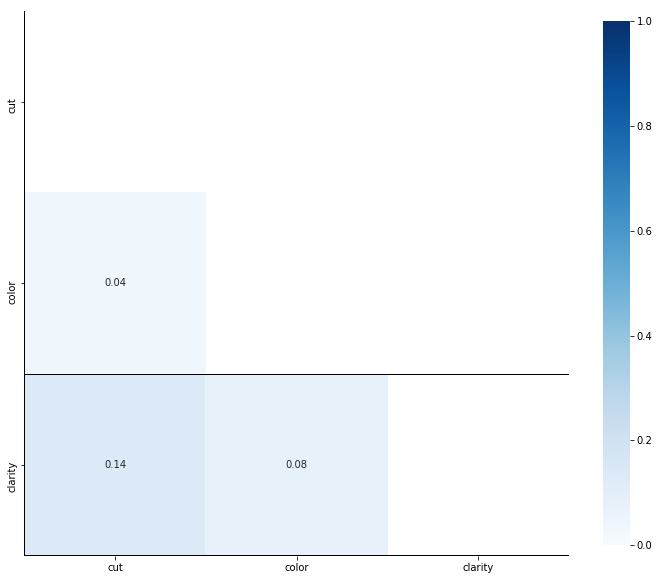

In [140]:
var_x_categorical = ['cut', 'color', 'clarity']

correlation_cramer_v_matrix(  data = data
                            , vars = var_x_categorical
                            , heatmap = True
                            , width = 10
                            , height = 10
                            , color_threshold = 0.75
                            , round = 2)

## Numeryczne

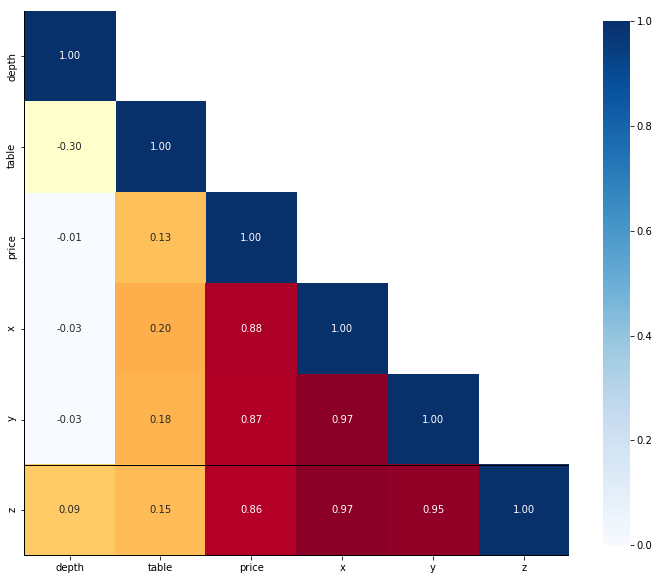

In [139]:
var_x_numeric = ['depth', 'table', 'price', 'x', 'y', 'z']

correlation_pearson(  data = data
                    , vars = var_x_numeric
                    , heatmap = True
                    , width = 10
                    , height = 10
                    , round = 2)

## Numeryczne vs kategoryczne

In [144]:
var_x_categorical = ['cut','color','clarity']
var_x_numeric     = ['price','table','depth','x','y','z']

correlation_ratio_matrix(  data = data
                         , vars_cat = var_x_categorical
                         , vars_num = var_x_numeric
                         , heatmap = False # obecnie funkcja nie dziala porpawnie
                         , width = 10
                         , height = 10
                         , round = 2)

price  table  depth     x     y     z
cut       0.11   0.57   0.35  0.19  0.17  0.19
color     0.18   0.06   0.05  0.28  0.28  0.28
clarity   0.16   0.16   0.10  0.38  0.37  0.38

# Analiza - korelacje targetu z zmiennymi objaśniającymi

## Feature importatnce (catboost)

In [147]:
vax_y = 'target'
var_x = ['cut', 'color', 'clarity', 'x', 'y', 'z', 'price', 'table']
var_x_categorical = ['cut', 'color', 'clarity']

train_x = data[var_x]
train_y = data[var_y]


feature_importance_class_CB( iterations     = 30
                            , learning_rate = 0.1
                            , depth         = 5
                            , cat_features  = var_x_categorical
                            , x_train       = train_x
                            , y_train       = train_y)



You should provide test set for use best model. use_best_model parameter has been switched to false value.


Feature Id  Importances
0    clarity       99.898
1          z        0.026
2      price        0.024
3      table        0.020
4          y        0.016
5          x        0.015
6        cut        0.000
7      color        0.000

# Outliers

In [311]:
# categorical variables target encoding
data_recoded = target_encoding(data=data, var_x=['cut','clarity','color'], var_y='target', var_y_convert_to_float = True)

outlieres_IF(n_estimators = 20, x_train=data_recoded)

carat    cut  color  clarity  depth  table  price     x     y     z  \
0       0.23  0.439  0.315      0.0   61.5   55.0    326  3.95  3.98  2.43   
1       0.21  0.269  0.315      0.0   59.8   61.0    326  3.89  3.84  2.31   
2       0.23  0.243  0.315      1.0   56.9   65.0    327  4.05  4.07  2.31   
3       0.29  0.269  0.337      0.0   62.4   58.0    334  4.20  4.23  2.63   
4       0.31  0.243  0.284      0.0   63.3   58.0    335  4.34  4.35  2.75   
...      ...    ...    ...      ...    ...    ...    ...   ...   ...   ...   
53935   0.72  0.439  0.234      0.0   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72  0.243  0.234      0.0   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  0.337  0.234      0.0   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86  0.269  0.320      0.0   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75  0.439  0.234      0.0   62.2   55.0   2757  5.83  5.87  3.64   

       target  target_multi_label  anomaly  
0           0                   0       -1  
1           0                   1       -1  
2           1                   2       -1  
3           0                   1        1  
4           0                   2        1  
...       ...                 ...      ...  
53935       0                   0        1  
53936       0                   2        1  
53937       0                   3        1  
53938       0                   1        1  
53939       0                   0        1  

[53940 rows x 13 columns]

# IML

## Shapley

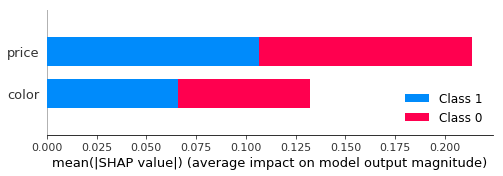

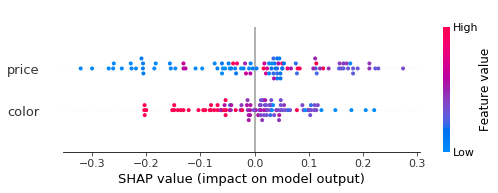

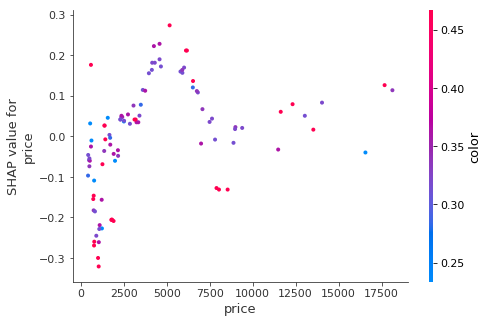

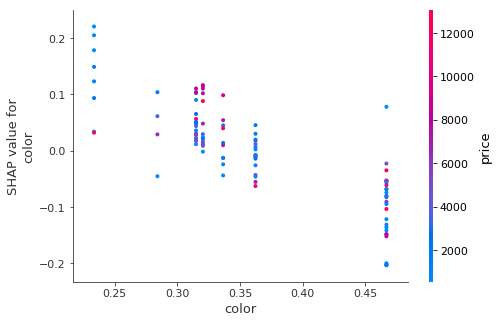

In [90]:
# categorical variables target encoding
data_recoded = target_encoding(data=data, var_x=['cut','clarity','color'], var_y='target', var_y_convert_to_float = True)


x_train = data_recoded[['price', 'color']]
y_train = data_recoded['target']

sample_size = 1000
model = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
  

shapley_value(model=model, x_train=x_train, y_train=y_train, sample_size = 100)

## Partial Dependence Plot

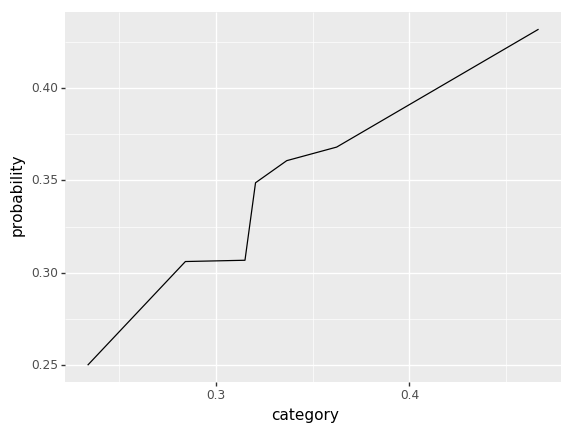

<ggplot: (165645217484)>

In [80]:
data_recoded = target_encoding(data=data, var_x=['cut','clarity','color'], var_y='target', var_y_convert_to_float = True)

x_train = data_recoded[['price', 'color']]
y_train = data_recoded['target']
model = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
var = 'color'


PDP_plot_RF(model = model, x_train = x_train, y_train = y_train, var = var)


# Model - binarny target

## Zmienne i zbiory

In [82]:
# zmienne
y_var = ['target']        # zmianna objasniana
x_var_num = ['price', 'x', 'y', 'z']  # zmienne objasniajace numeryczne
x_var_cat = ['color','cut'] # zmienne objasniajace kategoryczne
x_var = x_var_num + x_var_cat         # wszystkie zmienna objasniajace

data1 = data.iloc[1:5000,:] 

# podzial na zbioru 'data' na train i test
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(data1[x_var], data1[y_var], test_size=0.33)

# reset indexow na zbiorach
x_train = x_train.reset_index(drop=True)
x_test  = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

# umieszczenie w jednym zbiorze zmiennych objasniajacych i zmiennej objasnianej
train_set = pd.concat([x_train, y_train], axis = 1)
test_set  = pd.concat([x_test, y_test], axis = 1)

# zamiana zmiennej objasnianej na typ 'str'
train_set[y_var] = train_set[y_var].astype(str)
test_set[y_var]  = test_set[y_var].astype(str)



## Uczenie i performance

(3349, 7)
(1650, 7)


You should provide test set for use best model. use_best_model parameter has been switched to false value.


simulation_name                            description  x_n  y_name  \
0     symulacja_1  pierwszy model na wszyskich zmiennych    5  target   

  y_labels           x_num  x_cat cat_encoding balancing calibration  \
0     0, 1  price, x, y, z  color       target     under        None   

      simulation_start       simulation_end pos_label  priori  threshold  \
0  2020-06-14 14:20:27  2020-06-14 14:20:45         1     NaN        NaN   

     performance start      performance end threshold_priori_id  
0  2020-06-14 14:20:54  2020-06-14 14:21:03                  p2

None

[None,
 None,
 None,
 None,
 None,
 'recall = TP / TP + FN;   precision = TP / (TP + FP);    f1 = ( 2*TP ) / (2*TP + FP + FN );   balanced_accuracy = (TP/(TP+FN) + TN/(TN+FP)) / 2 ']

model_name set_type threshold_priori_id    0     1   2     3
0         ab     test                  p1    0  1150   0   500
0         ab    train                  p1    0  1005   0  1005
0         rf     test                  p1  524   626   9   491
0         rf    train                  p1  492   513   8   997
0         ab     test                  p2    0  1150   0   500
0         ab    train                  p2    0  1005   0  1005
0         rf     test                  p2  752   398  38   462
0         rf    train                  p2  685   320  42   963

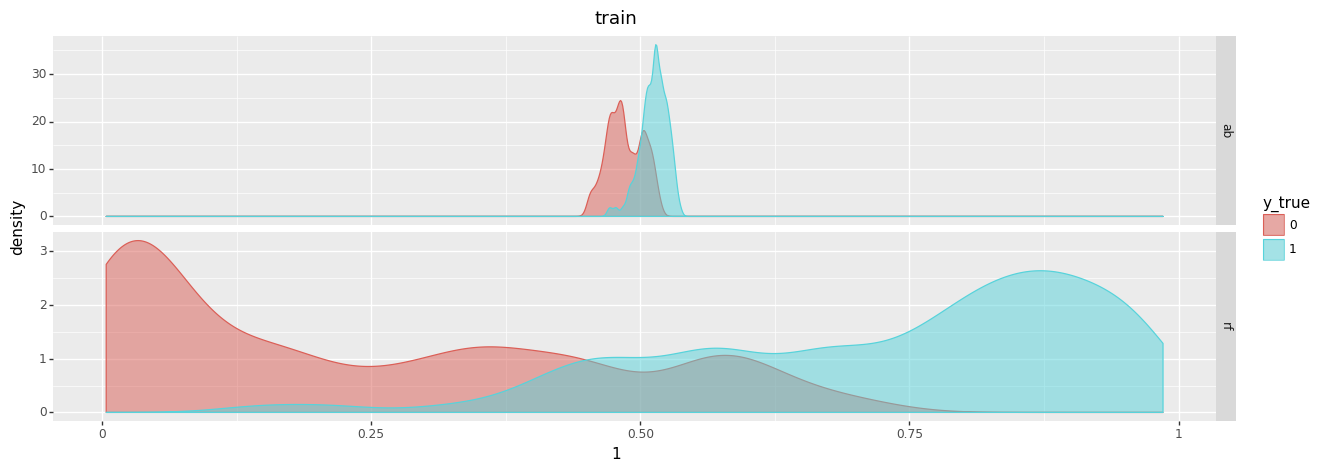

<ggplot: (-9223371871206040288)>

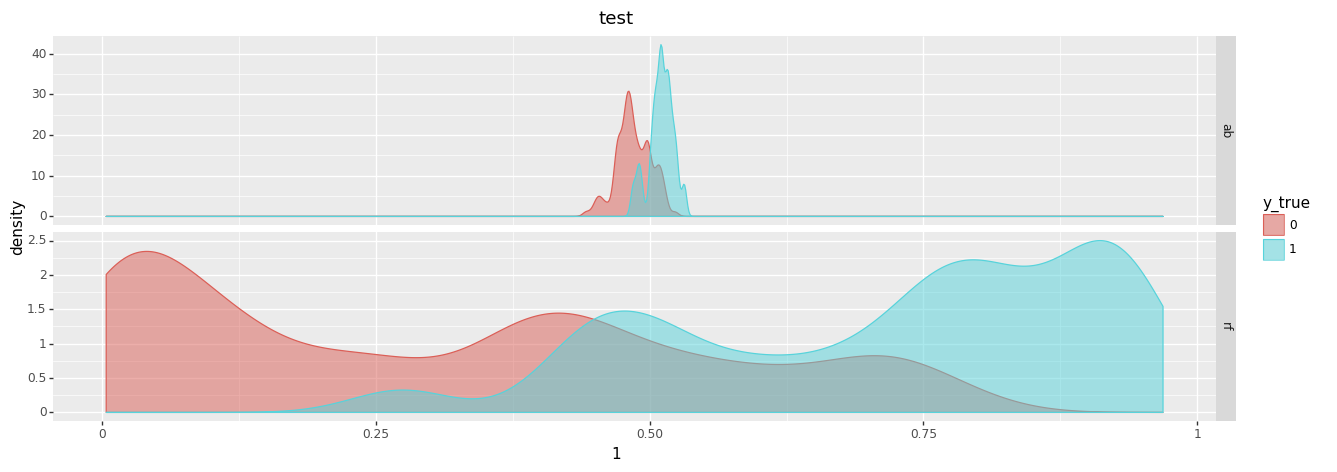

<ggplot: (165648988722)>

None

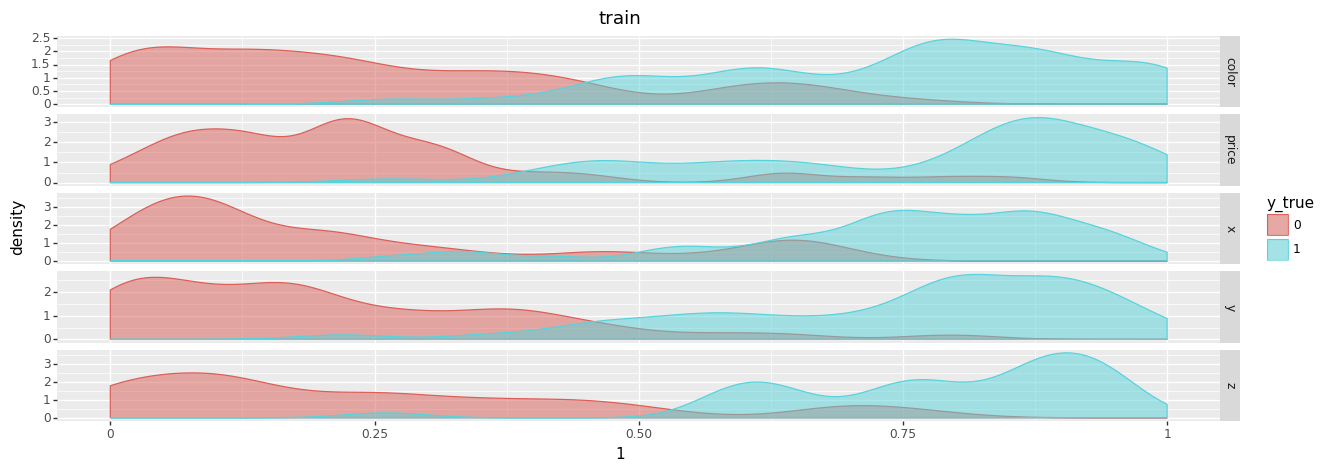

<ggplot: (-9223371871205794118)>

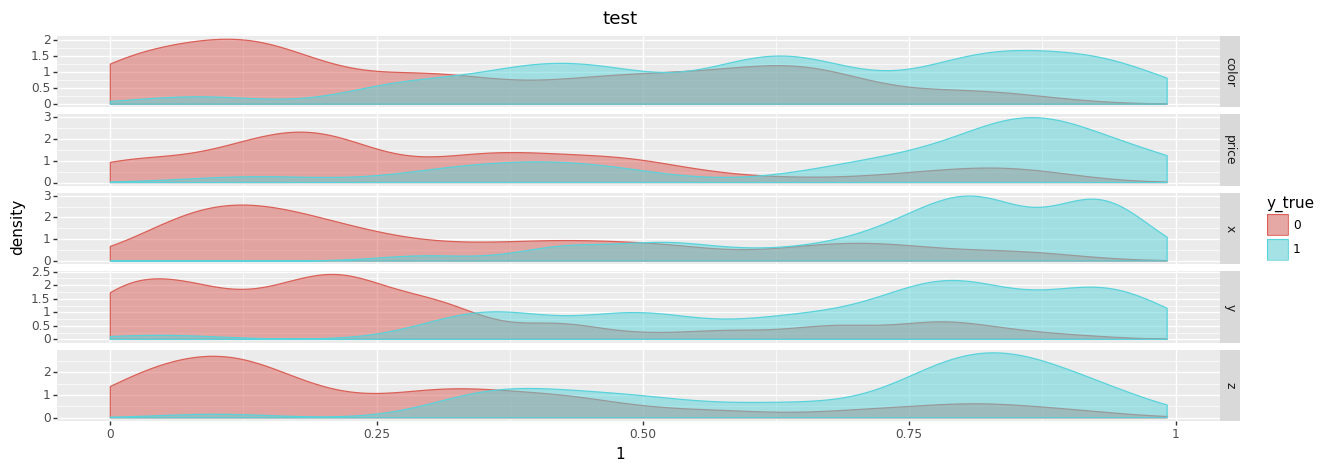

<ggplot: (-9223371871205611432)>

None

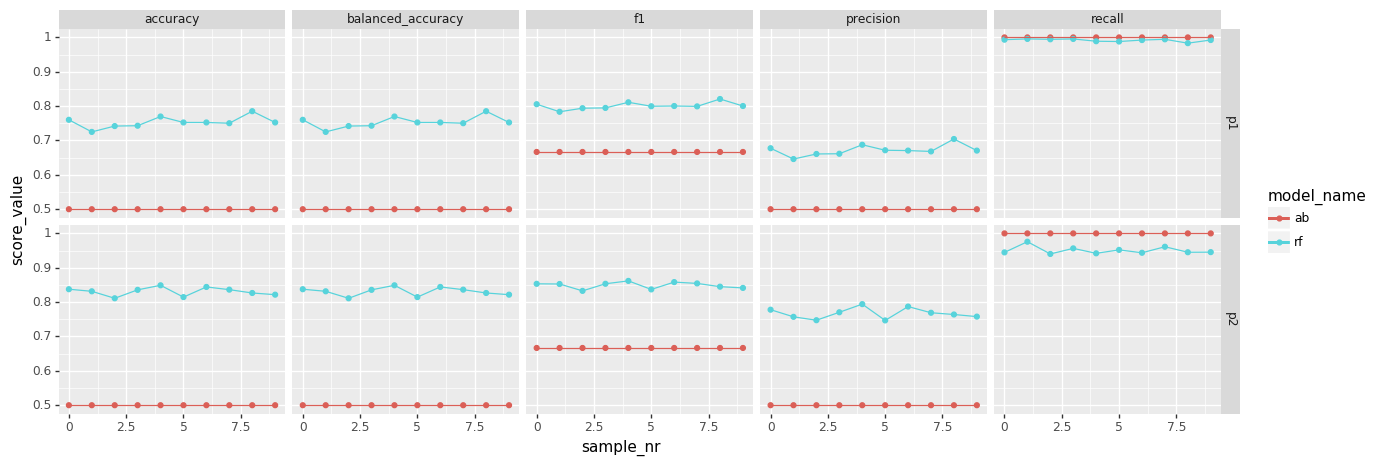

<ggplot: (165644715086)>

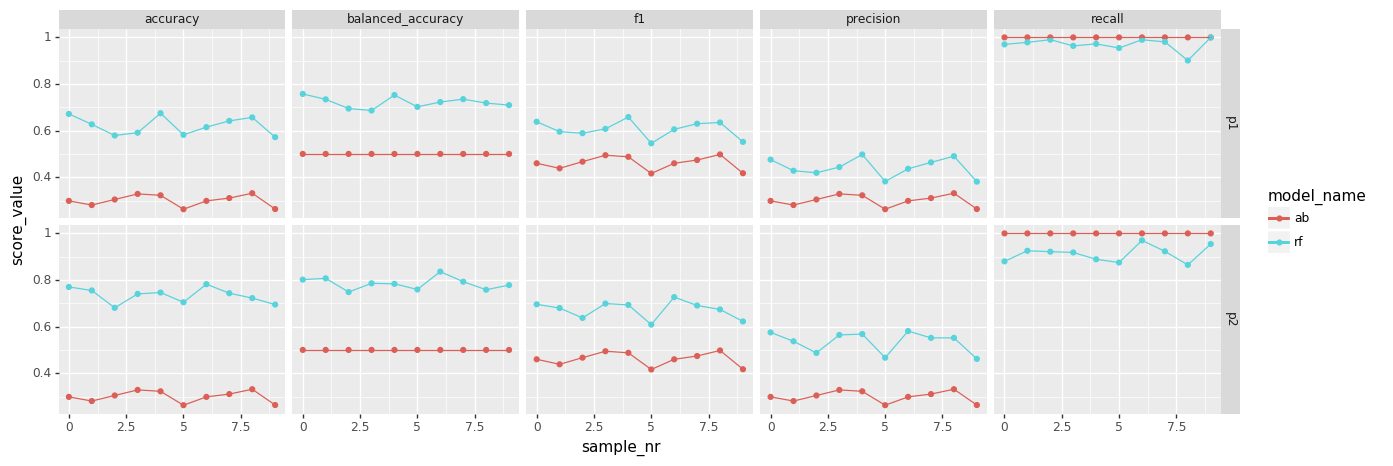

<ggplot: (165645426717)>

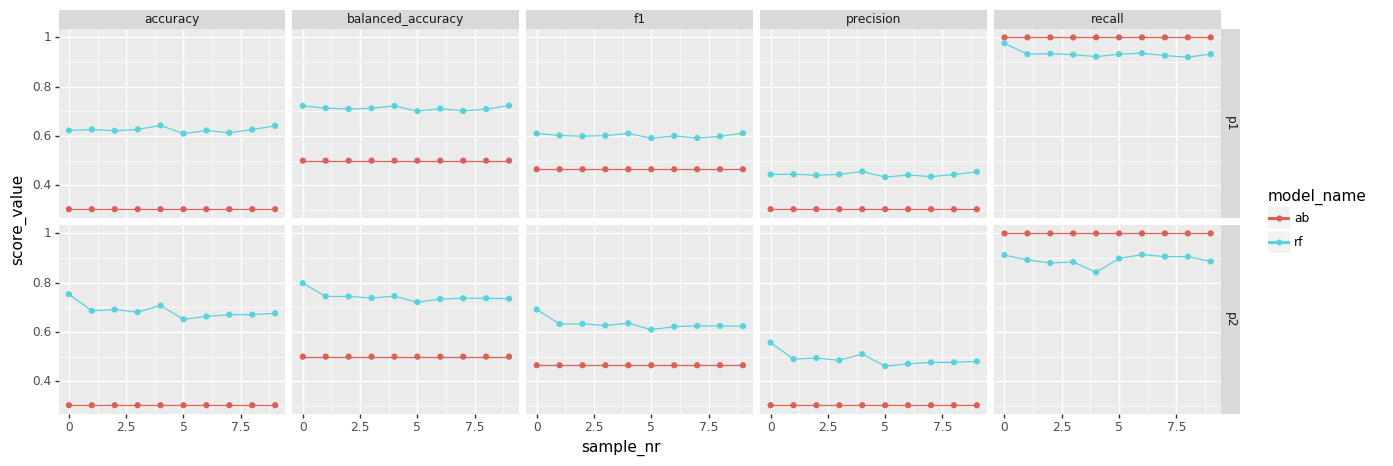

<ggplot: (-9223371871209354878)>

None

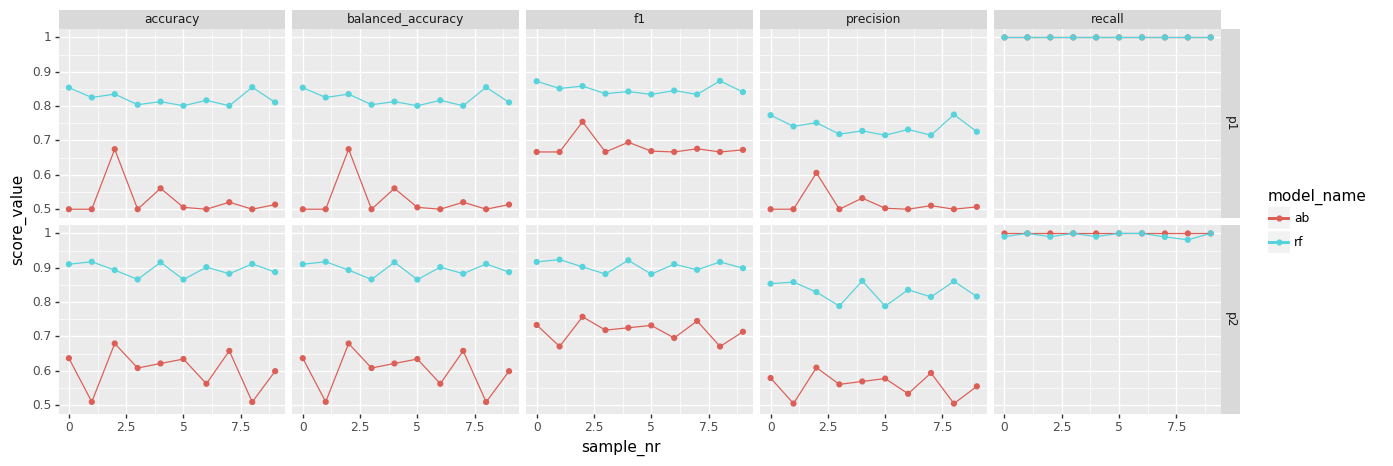

<ggplot: (165645241650)>

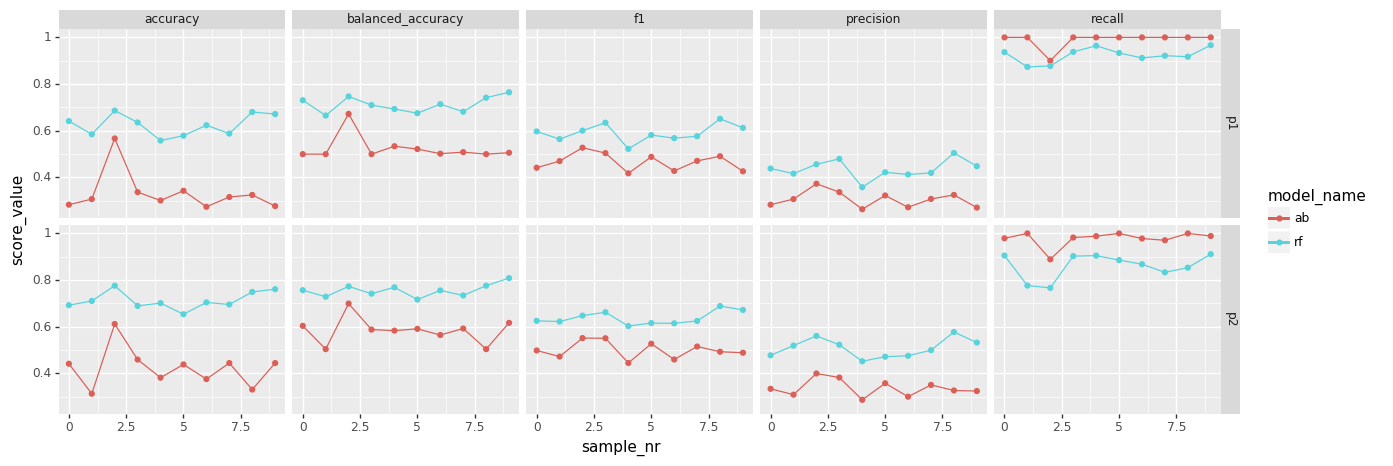

<ggplot: (165651052969)>

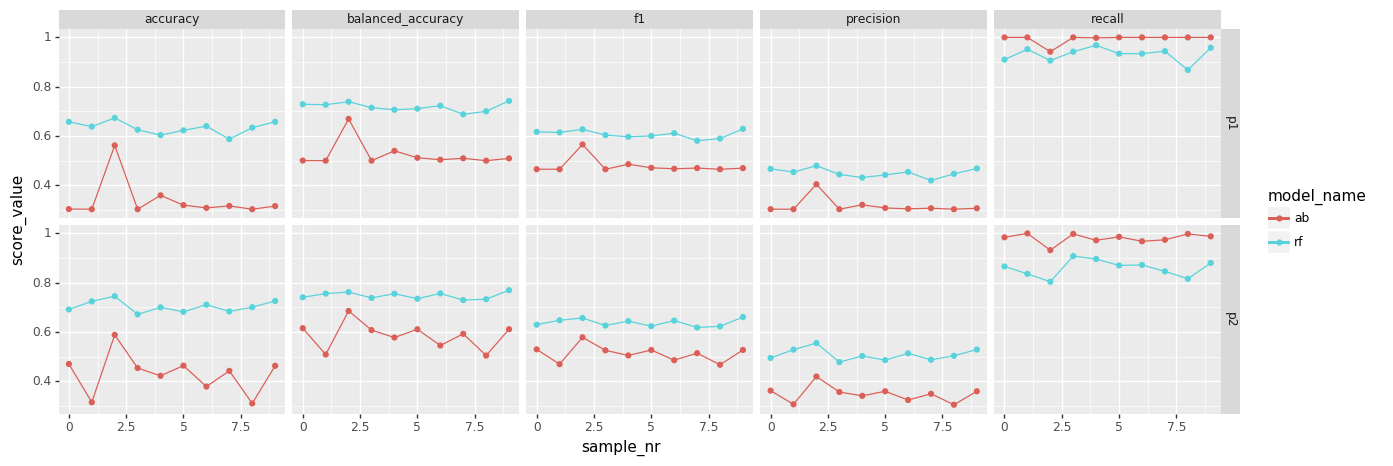

<ggplot: (165649000915)>

None

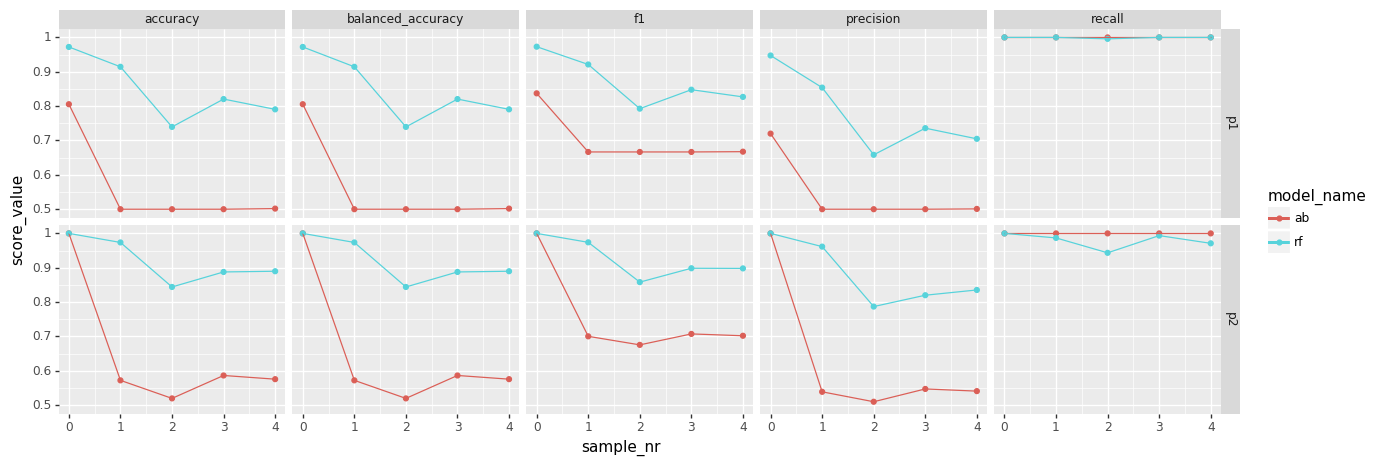

<ggplot: (-9223371871199743642)>

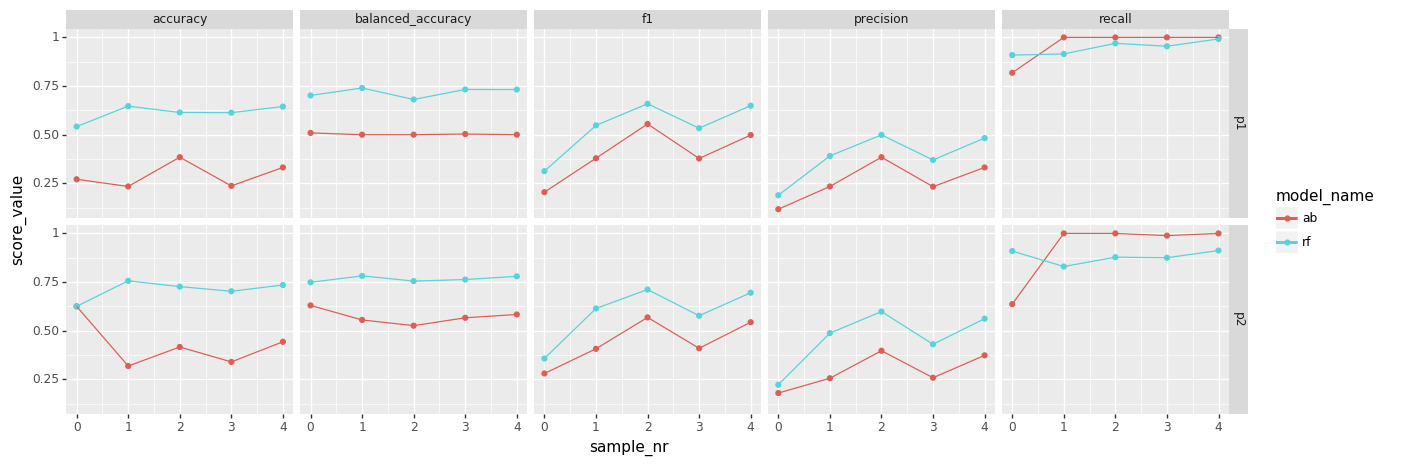

<ggplot: (-9223371871199508953)>

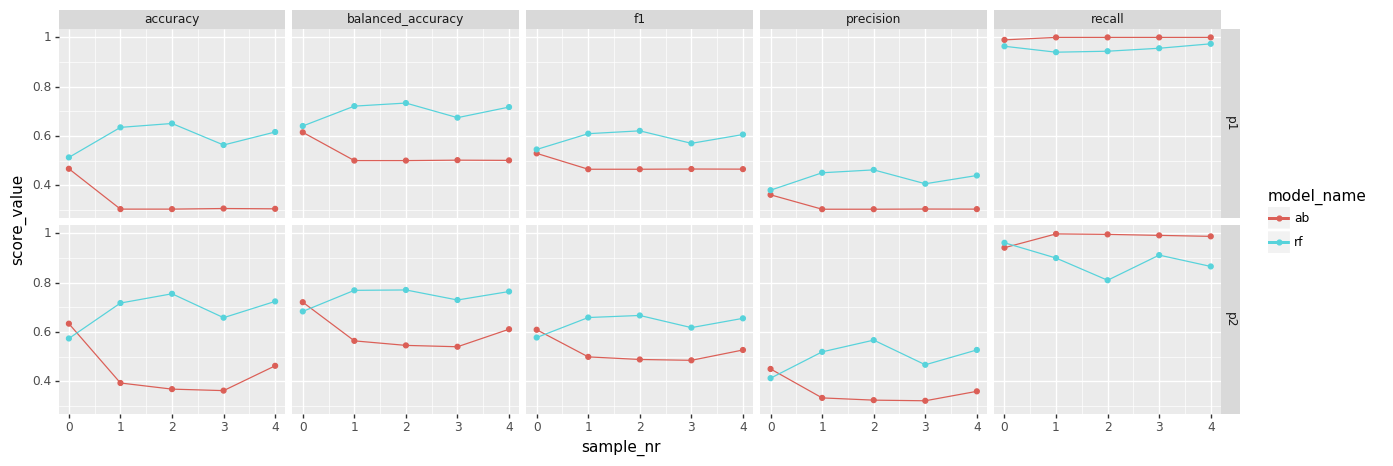

<ggplot: (165655046492)>

None

rf
ab


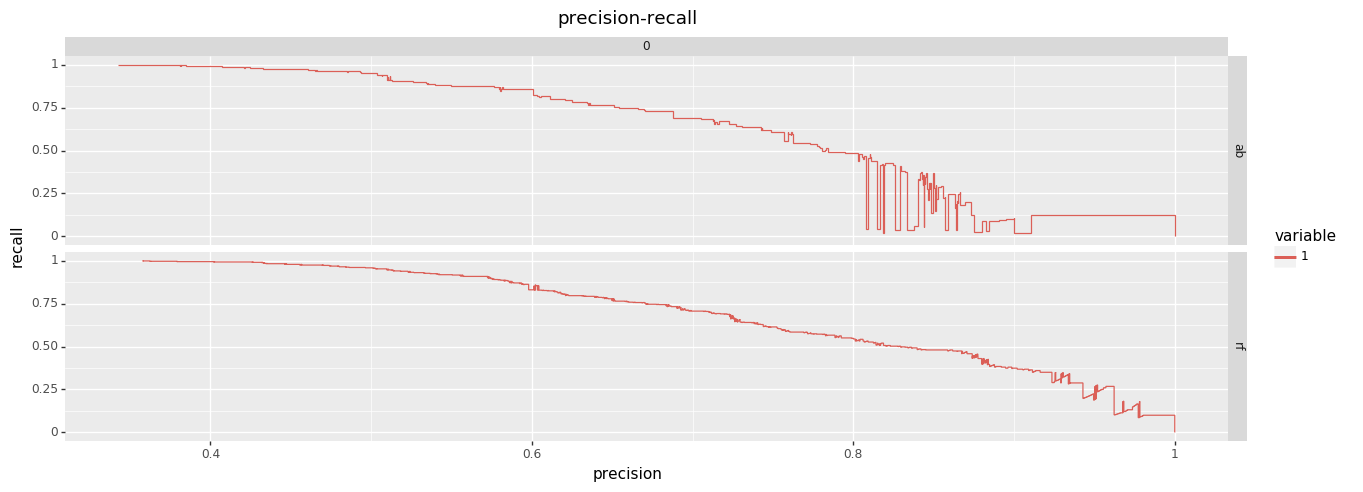

<ggplot: (-9223371871209782447)>

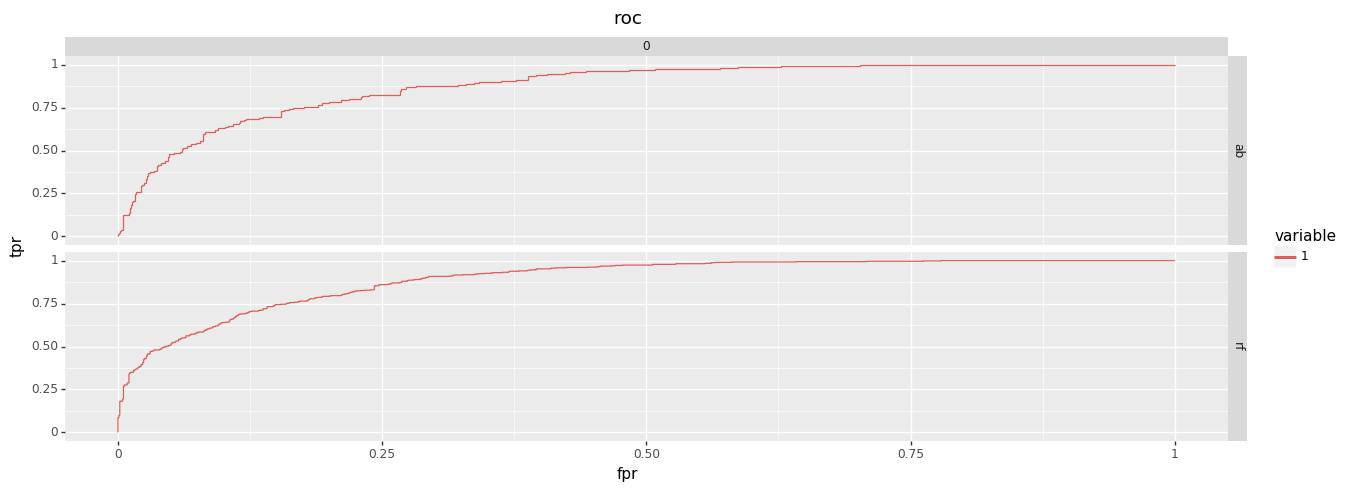

<ggplot: (-9223371871206761349)>

            average_precision
rf - 0 - 1              0.798
ab - 0 - 1              0.744
            roc_auc
rf - 0 - 1    0.893
ab - 0 - 1    0.879


None

rf
ab
price
x
y
z
color


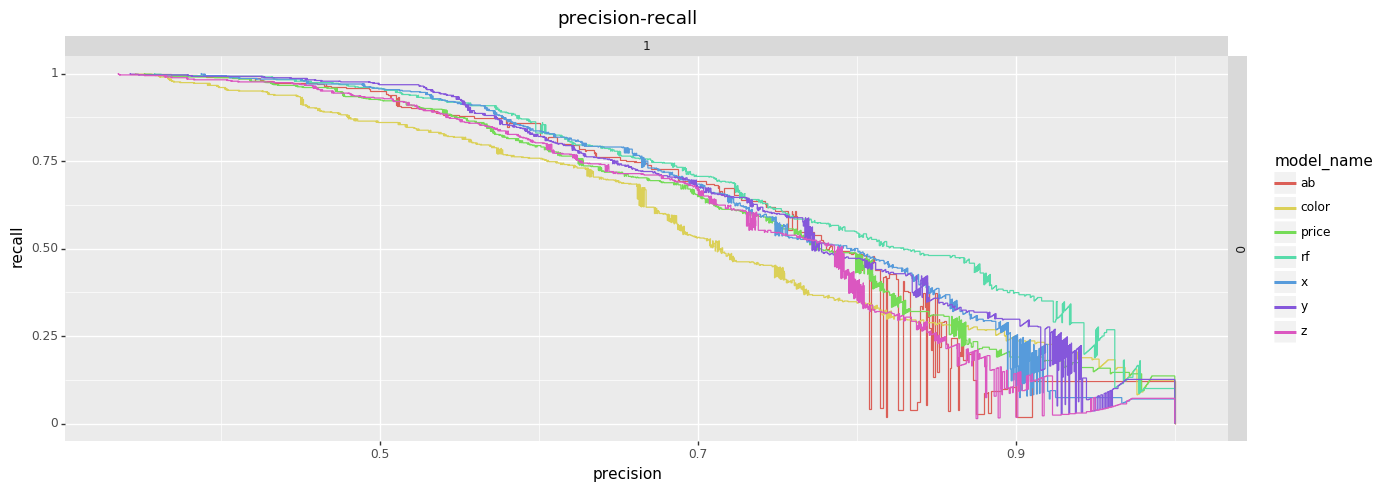

<ggplot: (-9223371871206307787)>

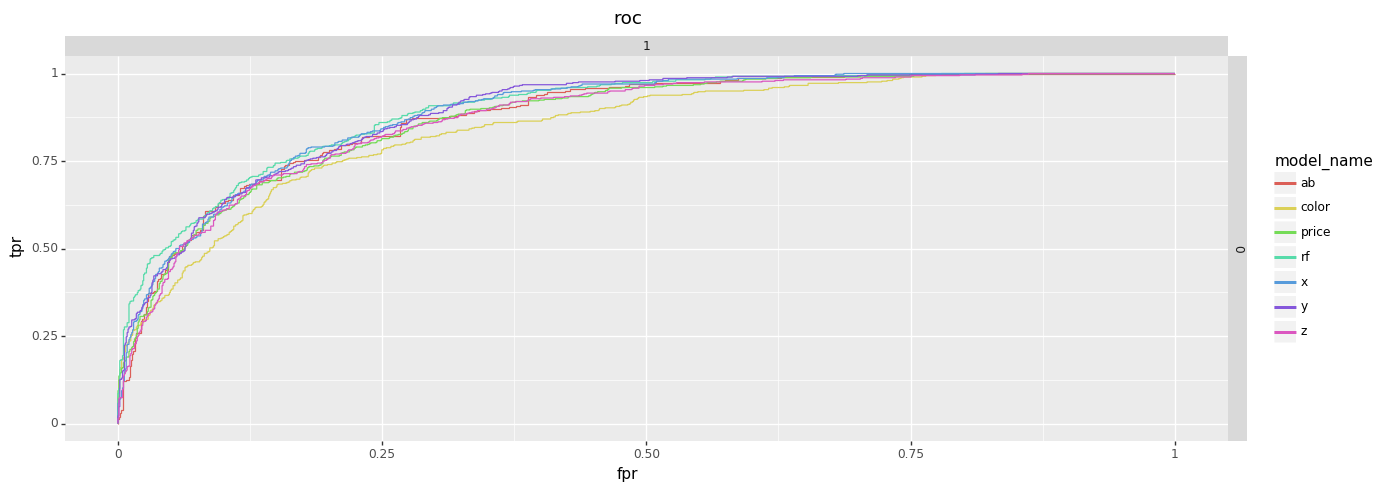

<ggplot: (165644376868)>

               average_precision
rf - 0 - 1                 0.798
y - 0 - 1                  0.772
x - 0 - 1                  0.769
price - 0 - 1              0.756
ab - 0 - 1                 0.744
z - 0 - 1                  0.740
color - 0 - 1              0.727
               roc_auc
rf - 0 - 1       0.893
y - 0 - 1        0.887
x - 0 - 1        0.887
ab - 0 - 1       0.879
price - 0 - 1    0.872
z - 0 - 1        0.870
color - 0 - 1    0.845


None

In [83]:
# PARAMETRY DLA 'UCZENIA MODELI'
simulation_name        = 'symulacja_1' # unikalna nazwa symulacji
simulation_description = 'pierwszy model na wszyskich zmiennych' # opis symulacji
models_list            = {'rf':models_base['rf'], 'ab':models_base['ab']} # slownik modeli do nauki wybranych z listy 'model_base'
cv_n                   = 10     # walidacja krzyzowa: ilosc k-foldow na walidacji krzyzowej (None jezeli nie chcemy walidacji krzyzowej)
hold_n                 = 10     # walidacja holdout: ilosc samplow na holdout (None jezeli nie chcemy walidacji holdout)
hold_train_sample_size = 0.1   # walidacja holdout: wielkosc losowanego zbioru train na holdout
hold_test_sample_size  = 0.1   # walidacja holdout: wielkosc losowanego zbioru test na holdout
fip_n                  = 1  # walidacja feature importatnce permutation:  ilosc samplow (None jezeli nie chcemy. Jezeli chcemy, zalecana wartosc to 1)
model_fip              = RandomForestClassifier(n_estimators=20, max_depth=7) # walidacja feature importatnce permutation: okreslenie modelu
by_var                 = 'cut' # walidacja segmentacyjna: zmienna po ktore wykonac segmentacje by_var (None jezeli nie chcemy)
pos_label              = '1'   # ktory label zmiennej objasnianej jest traktowany jako 'positive'
balancing_method       = 'under'  # metoda balansowania (dostepne: ''over', 'under', 'None')
calibration_method     = None # metoda kalibracji prawdopodobienstwa (dostepne : 'isotonic', 'None')
cat_encoding_method    = 'target' # metoda enkodowania zmiennych kategorycznych (dostepne: 'target', 'None')

# PARAMETRY DLA 'PERFORMANCE'
thresholds_priori_list ={  'p1':[{'0':0.5, '1':0.5},{'0':0.2, '1':0.8}]
                         , 'p2':[{'0':0.3, '1':0.7},{'0':0.2, '1':0.8}]} # thresholdy i priori dla kazdej kategorii (jezeli damy 'None' dla thresholdow przypisywanie odbywa sie poprzez max(pd))


# INICJALIZACJA nowego obiektu do symulacji (na tym obiekcie bedziemy wykonywac kolejne symulacje, więc kolejne inicjalizacje nie sa potrzebne)
c1 = classification_model()

# UCZENIE MODELI (obliczane tylko prawdopodobienstwa)
c1.simulation(  train_set = train_set, test_set = test_set, y_var = y_var, x_var_num = x_var_num, x_var_cat = x_var_cat, by_var=by_var
              , balancing_method=balancing_method
              , cv_n=cv_n, fip_n=fip_n, hold_n = hold_n, hold_train_sample_size = hold_train_sample_size, hold_test_sample_size = hold_test_sample_size
              , data_check=True, models_list=models_list, correlation = True, model_fip = RandomForestClassifier(n_estimators=30, max_depth=7)
              , simulation_name = simulation_name, description = simulation_description)

# PERFORMANCE (na uzyskane w poprzednim kroku prawdopodobienstwa nadkladamy thresholdy i liczymy scory confusion matrix itp.)
c1.performance_multi_thr(thresholds_priori_list = thresholds_priori_list, simulation_name = simulation_name, pos_label = '1' )

 
# ZAPISANIE wynikow na dysk
c1.save_results(path = r'C:\Users\memy\OneDrive\Pulpit\1_Programs_and_programing\DS_proj\classification_python\results\symulacja_1', override = True)

# lADOWANIE wynikow z dysku do zainicjonanego wczeniej pustego obiektu
# c1.load_results(path = '...')

# WIZUALIZACJA WYNIKOW
c1.summary_big(simulation_name, pos_label, cv_n, hold_n, by_var)

# Model - wielostanowy target

## Zmienne i zbiory

In [28]:
# zmienne
y_var = ['target_multi_label']        # zmianna objasniana
x_var_num = ['price', 'x', 'y', 'z']  # zmienne objasniajace numeryczne
x_var_cat = ['color','clarity'] # zmienne objasniajace kategoryczne
x_var = x_var_num + x_var_cat         # wszystkie zmienna objasniajace

# podzial na zbioru 'data' na train i test
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(data[x_var], data[y_var], test_size=0.33)

# reset indexow na zbiorach
x_train = x_train.reset_index(drop=True)
x_test  = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

# umieszczenie w jednym zbiorze zmiennych objasniajacych i zmiennej objasnianej
train_set = pd.concat([x_train, y_train], axis = 1)
test_set  = pd.concat([x_test, y_test], axis = 1)

# zamiana zmiennej objasnianej na typ 'str'
train_set[y_var] = train_set[y_var].astype(str)
test_set[y_var]  = test_set[y_var].astype(str)



## Uczenie i performance

In [29]:
# Parametry symulacji do UCZENIA MODELI
simulation_name        = 'symulacja_1' # unikalna nazwa symulacji
simulation_description = 'pierwszy model na wszyskich zmiennych' # opis symulacji
models_list            = {'rf':models_base['rf'], 'ab':models_base['ab']} # slownik modeli do nauki wybranych z listy 'model_base'
cv_n                   = 2     # walidacja krzyzowa: ilosc k-foldow na walidacji krzyzowej (None jezeli nie chcemy walidacji krzyzowej)
hold_n                 = 2     # walidacja holdout: ilosc samplow na holdout (None jezeli nie chcemy walidacji holdout)
hold_train_sample_size = 0.1   # walidacja holdout: wielkosc losowanego zbioru train na holdout
hold_test_sample_size  = 0.1   # walidacja holdout: wielkosc losowanego zbioru test na holdout
fip_n                  = 1     # walidacja feature importatnce permutation:  ilosc samplow (None jezeli nie chcemy. Jezeli chcemy, zalecana wartosc to 1)
model_fip              = RandomForestClassifier(n_estimators=20, max_depth=7) # walidacja feature importatnce permutation: okreslenie modelu
by_var                 = 'clarity' # walidacja segmentacyjna: zmienna po ktore wykonac segmentacje by_var (None jezeli nie chcemy)
pos_label              = '1'   # ktory label zmiennej objasnianej jest traktowany jako 'positive'
balancing_method       = None  # dla modeli wieloklasowych niedostepne
calibration_method     = None # metoda kalibracji prawdopodobienstwa (dostepne : 'isotonic', 'None')
cat_encoding_method    = 'target' # metoda enkodowania zmiennych kategorycznych (dostepne: 'target', 'None')

# parematry dla PERFORMANCE (dla zagadnienie wialostenowego nie ma thresholdow. Jest tylko wazenie priori gdzie wagu sumuja sie do wartosci 1)
thresholds_priori_list ={  'p1':[None,{'0':0.2, '1':0.2, '2':0.2, '3':0.2,'4':0.2}]
      , 'p2':[None,{'0':0.1, '1':0.3, '2':0.2, '3':0.2,'4':0.2}]} # thresholdy i priori dla kazdej kategorii (jezeli damy 'None' dla thresholdow przypisywanie odbywa sie poprzez max(pd))


# inicjalizacja nowego obiektu do symulacji (na tym obiekcie bedziemy wykonywac kolejne symulacje, więc kolejne inicjalizacje nie sa potrzebne)
c1 = classification_model()

# UCZENIE MODELI (obliczane tylko prawdopodobienstwa)
c1.simulation(  train_set = train_set, test_set = test_set, y_var = y_var, x_var_num = x_var_num, x_var_cat = x_var_cat, by_var=by_var
              , balancing_method=balancing_method
              , cv_n=cv_n, fip_n=fip_n, hold_n = hold_n, hold_train_sample_size = hold_train_sample_size, hold_test_sample_size = hold_test_sample_size
              , data_check=True, models_list=models_list, correlation = True, model_fip = RandomForestClassifier(n_estimators=30, max_depth=7)
              , simulation_name = simulation_name, description = simulation_description)

# PERFORMANCE (na uzyskane w poprzednim kroku prawdopodobienstwa nadkladamy thresholdy i liczymy scory confusion matrix itp.)
c1.performance_multi_thr(thresholds_priori_list = thresholds_priori_list, simulation_name = simulation_name, pos_label = '1' )

# zapisanie wynikow na dysk
c1.save_results(path = r'C:\Users\memy\OneDrive\Pulpit\1_Programs_and_programing\DS_proj\classification_python\results\symulacja_1', override = True)

# ladowanie z dysku do zainicjonanweg wczeniej pustego obiektu
# c1.load_results(path = '...')

(36139, 7)
(17801, 7)
(36139, 7)
(17801, 7)
cv 0
0
(18069, 5)
(18070, 5)
(17801, 5)
1
(18070, 5)
(18069, 5)
(17801, 5)
cv 1
0
(18069, 5)
(18070, 5)
(17801, 5)
1
(18070, 5)
(18069, 5)
(17801, 5)
hold 0
(3613, 5)
(3614, 5)
(17801, 5)
(3613, 5)
(3614, 5)
(17801, 5)
hold 1
(3613, 5)
(3614, 5)
(17801, 5)
(3613, 5)
(3614, 5)
(17801, 5)
by_var 0
(512, 5)
(229, 5)
(17801, 5)
(1196, 5)
(594, 5)
(17801, 5)
(8692, 5)
(4373, 5)
(17801, 5)
(6205, 5)
(2989, 5)
(17801, 5)
(5540, 5)
(2631, 5)
(17801, 5)
(8245, 5)
(4013, 5)
(17801, 5)
(2418, 5)
(1237, 5)
(17801, 5)
(3331, 5)
(1735, 5)
(17801, 5)
by_var 1
(512, 5)
(229, 5)
(17801, 5)
(1196, 5)
(594, 5)
(17801, 5)
(8692, 5)
(4373, 5)
(17801, 5)
(6205, 5)
(2989, 5)
(17801, 5)
(5540, 5)
(2631, 5)
(17801, 5)
(8245, 5)
(4013, 5)
(17801, 5)
(2418, 5)
(1237, 5)
(17801, 5)
(3331, 5)
(1735, 5)
(17801, 5)
full 0
full 1
feature_importance
fip 0
None
{'0': 0.2, '1': 0.2, '2': 0.2, '3': 0.2, '4': 0.2}
THRESHOLD
None
('symulacja_1', 'ab', 'test', 'by_var', 0, 'I1', 0

('symulacja_1', 'rf', 'test', 'cv', 1, '_', 0, 'p2')
('symulacja_1', 'rf', 'test', 'full', 0, '_', 0, 'p2')
('symulacja_1', 'rf', 'test', 'hold', 0, '_', 0, 'p2')
('symulacja_1', 'rf', 'test', 'hold', 1, '_', 0, 'p2')
('symulacja_1', 'rf', 'train', 'by_var', 0, 'I1', 0, 'p2')
('symulacja_1', 'rf', 'train', 'by_var', 1, 'IF', 0, 'p2')
('symulacja_1', 'rf', 'train', 'by_var', 2, 'SI1', 0, 'p2')
('symulacja_1', 'rf', 'train', 'by_var', 3, 'SI2', 0, 'p2')
('symulacja_1', 'rf', 'train', 'by_var', 4, 'VS1', 0, 'p2')
('symulacja_1', 'rf', 'train', 'by_var', 5, 'VS2', 0, 'p2')
('symulacja_1', 'rf', 'train', 'by_var', 6, 'VVS1', 0, 'p2')
('symulacja_1', 'rf', 'train', 'by_var', 7, 'VVS2', 0, 'p2')
('symulacja_1', 'rf', 'train', 'cv', 0, '_', 0, 'p2')
('symulacja_1', 'rf', 'train', 'cv', 1, '_', 0, 'p2')
('symulacja_1', 'rf', 'train', 'full', 0, '_', 0, 'p2')
('symulacja_1', 'rf', 'train', 'hold', 0, '_', 0, 'p2')
('symulacja_1', 'rf', 'train', 'hold', 1, '_', 0, 'p2')
('symulacja_1', 'rf', 'val

## Wizualizacja

simulation_name                            description  x_n  \
0     symulacja_1  pierwszy model na wszyskich zmiennych    5   

               y_name       y_labels           x_num  x_cat cat_encoding  \
0  target_multi_label  0, 1, 2, 3, 4  price, x, y, z  color       target   

  balancing calibration     simulation_start       simulation_end pos_label  \
0      None        None  2020-06-13 01:45:31  2020-06-13 01:46:43         1   

   priori  threshold    performance start      performance end  \
0     NaN        NaN  2020-06-13 01:48:05  2020-06-13 01:49:42   

  threshold_priori_id  
0                  p2

[None,
 None,
 None,
 None,
 None,
 'recall = TP / TP + FN;   precision = TP / (TP + FP);    f1 = ( 2*TP ) / (2*TP + FP + FN );   balanced_accuracy = (TP/(TP+FN) + TN/(TN+FP)) / 2 ']

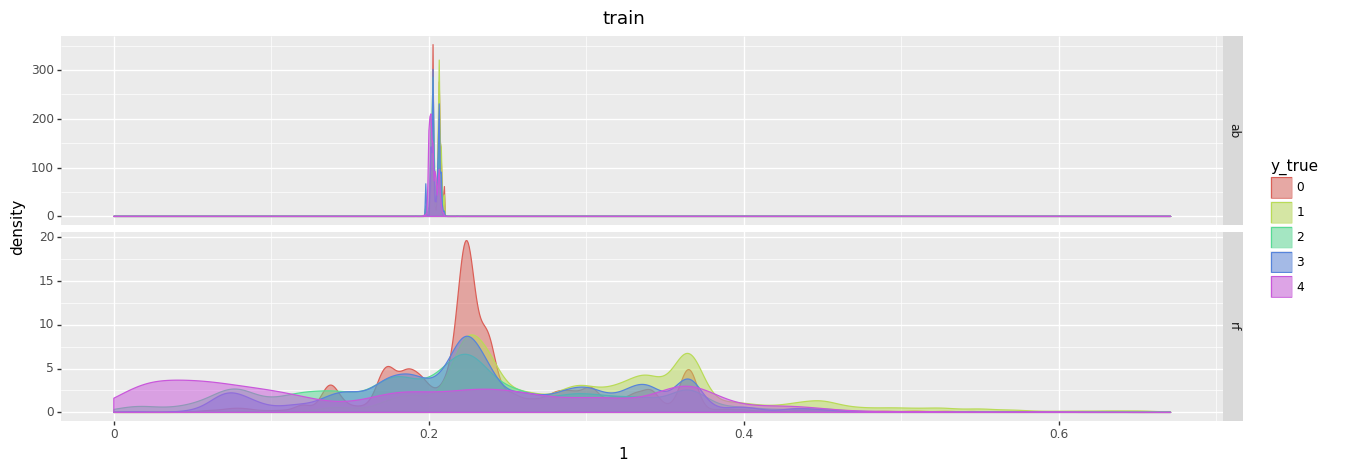

<ggplot: (193856114927)>

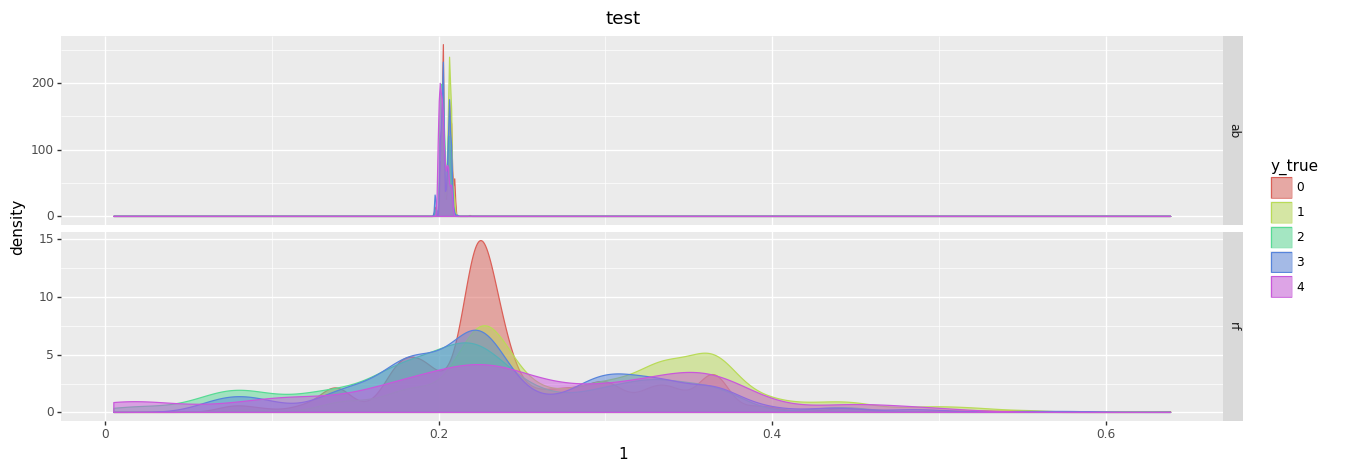

<ggplot: (-9223371842998666296)>

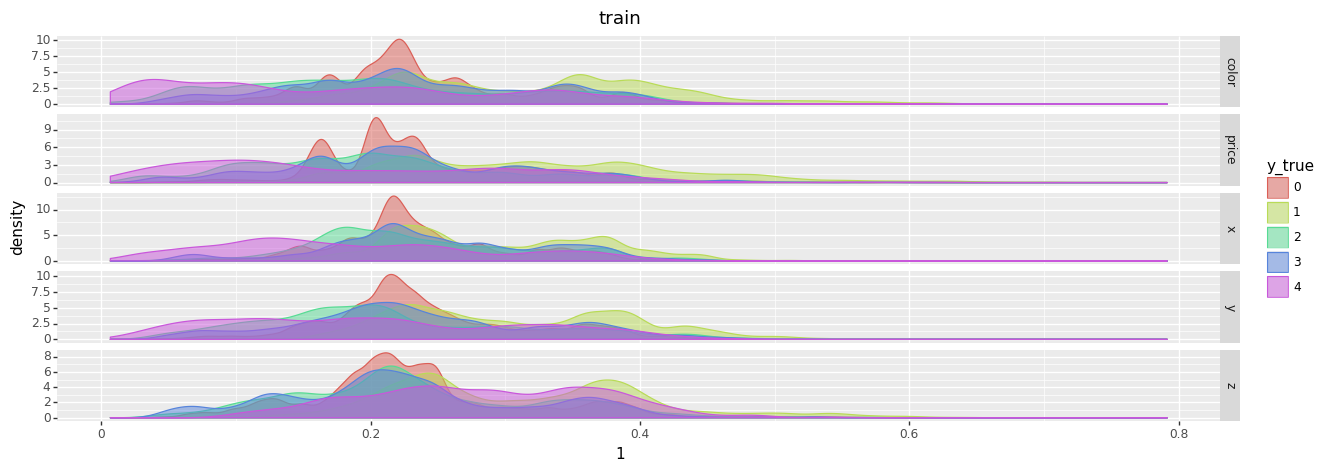

<ggplot: (-9223371842998232460)>

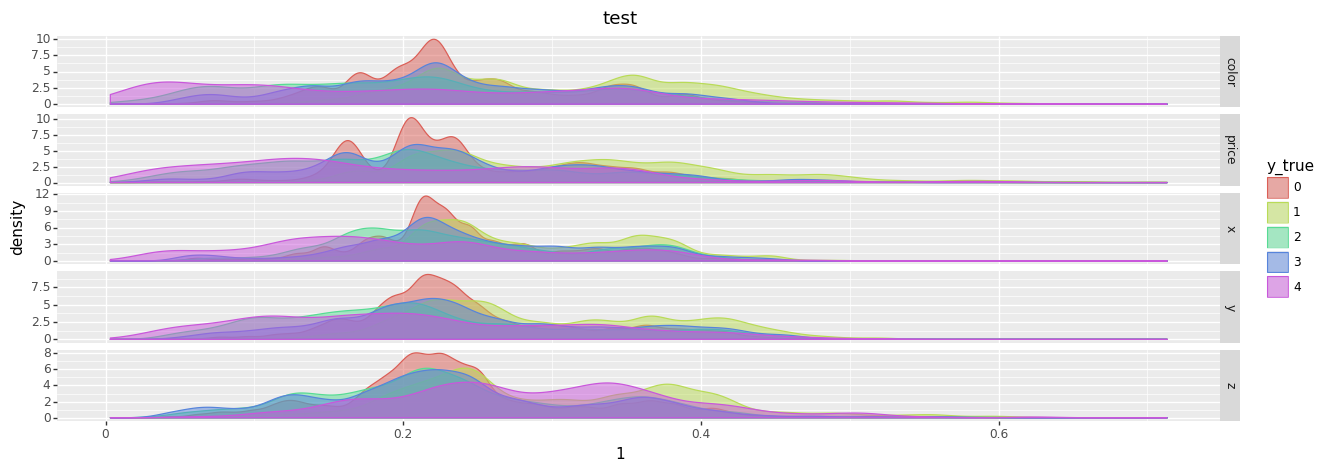

<ggplot: (-9223371842998232481)>

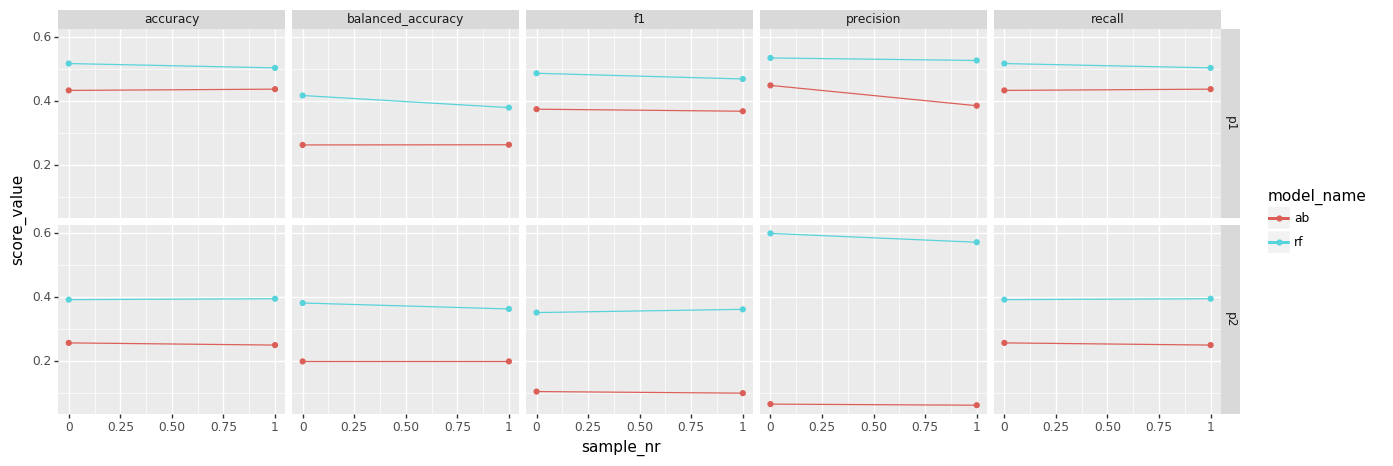

<ggplot: (193859769415)>

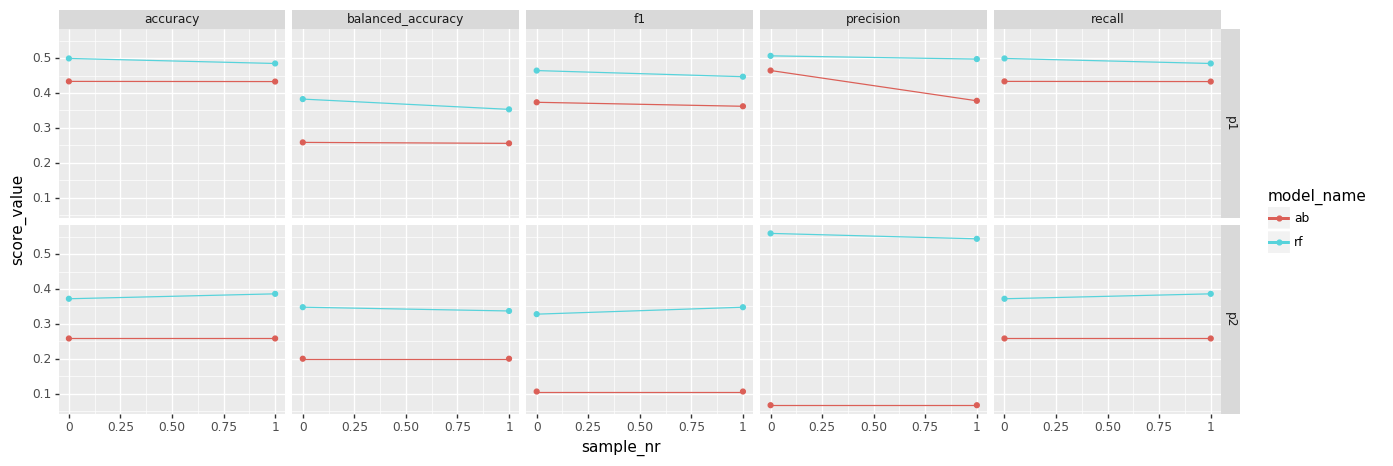

<ggplot: (-9223371843001370631)>

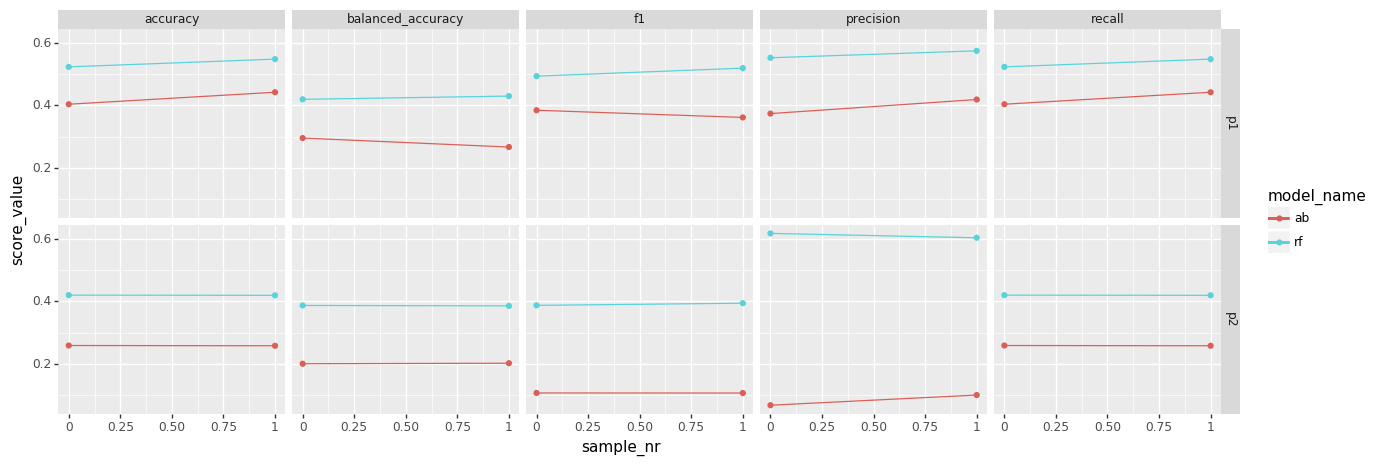

<ggplot: (-9223371843001376652)>

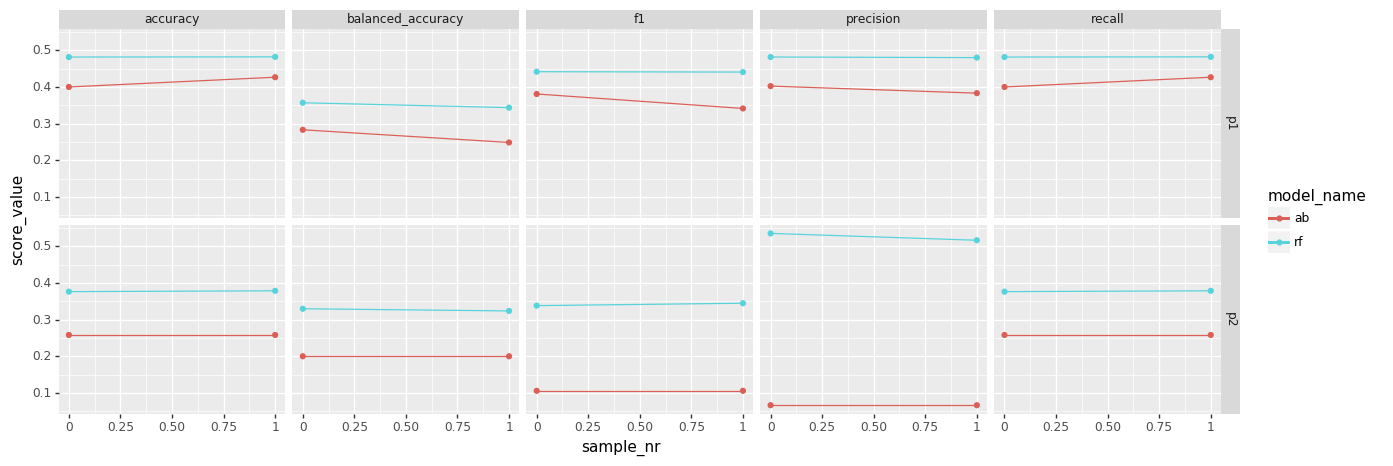

<ggplot: (193853771170)>

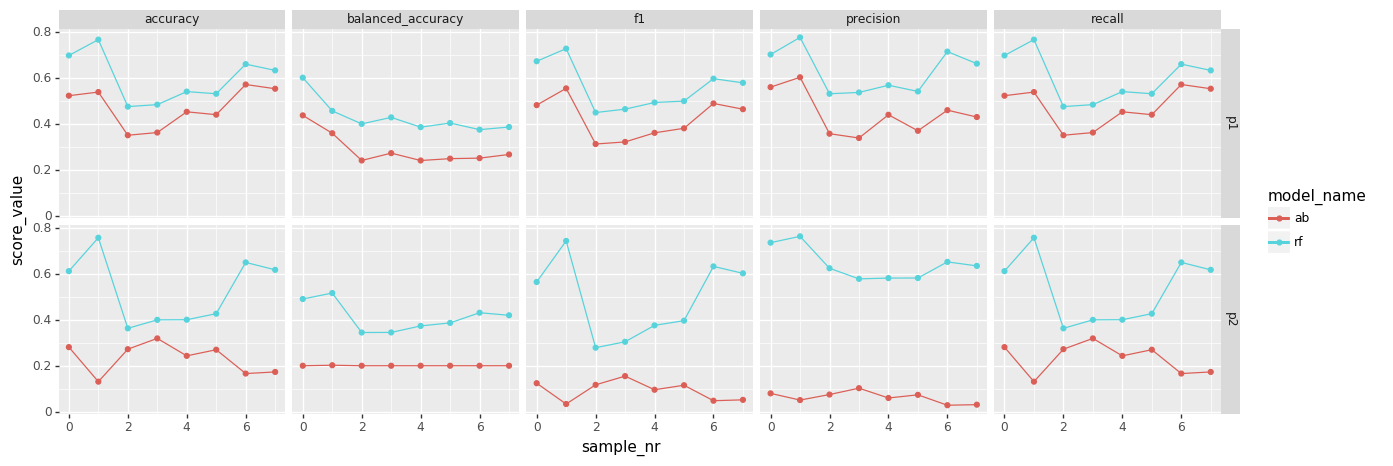

<ggplot: (-9223371842998409938)>

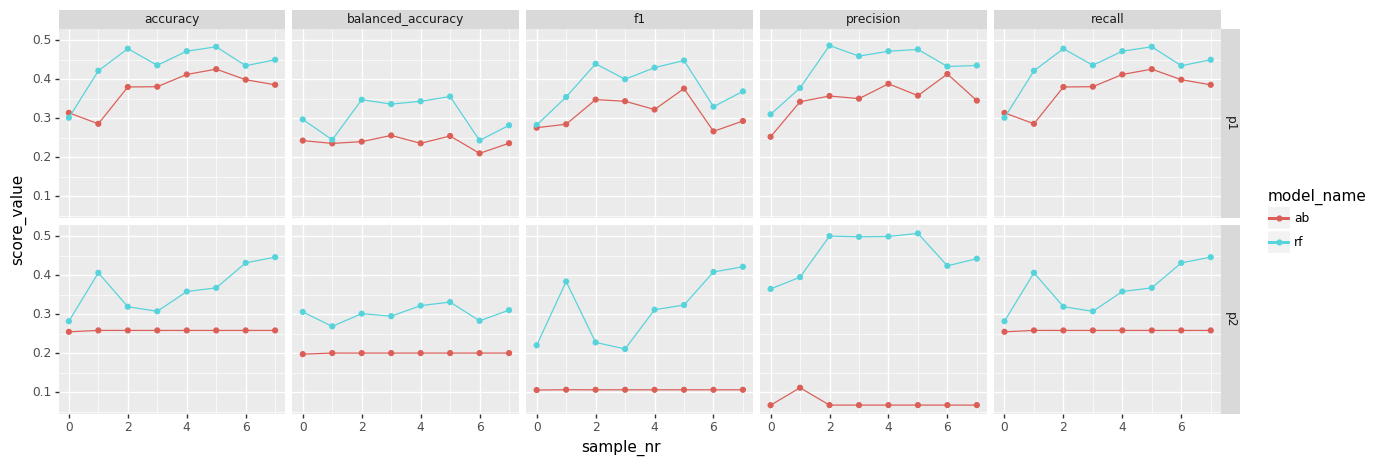

<ggplot: (-9223371842995235847)>

rf
ab


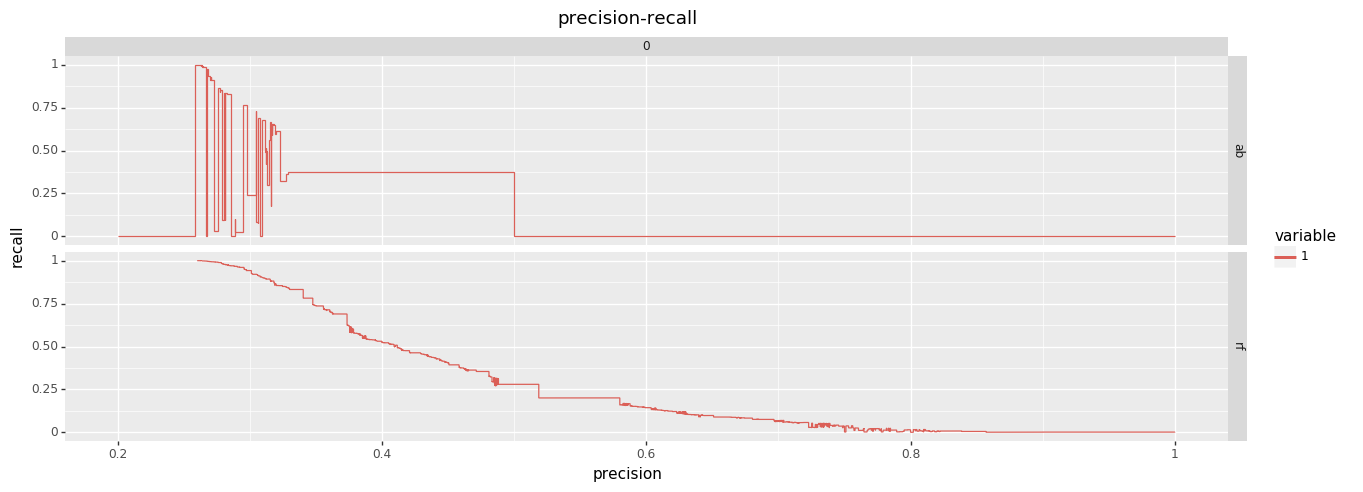

<ggplot: (-9223371842995379242)>

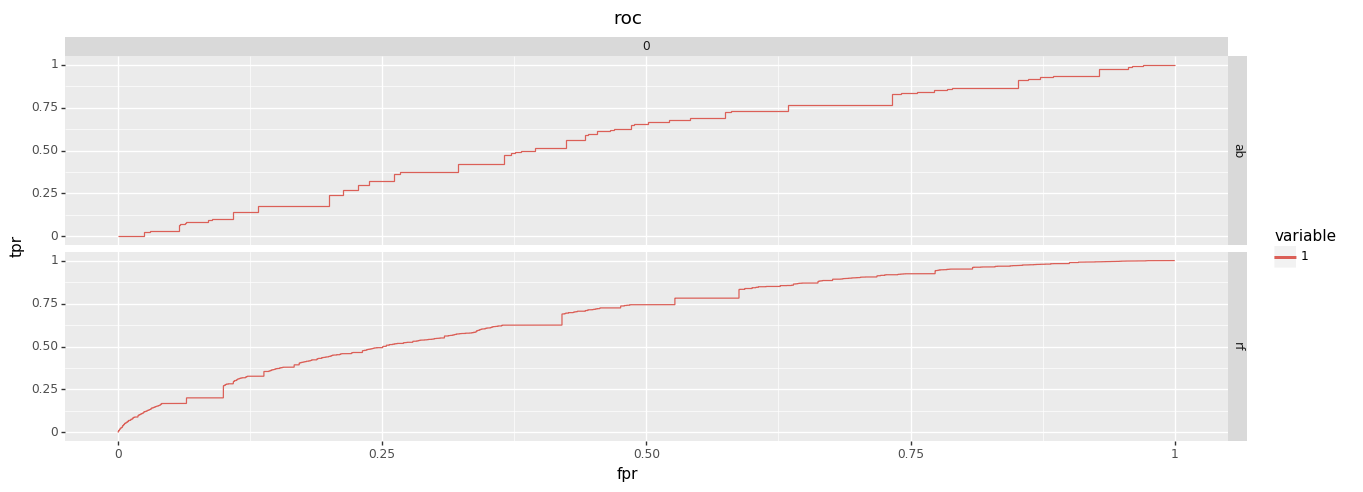

<ggplot: (-9223371842998984227)>

            average_precision
rf - 0 - 1              0.441
ab - 0 - 1              0.300
            roc_auc
rf - 0 - 1    0.692
ab - 0 - 1    0.585


rf
ab
price
x
y
z
color


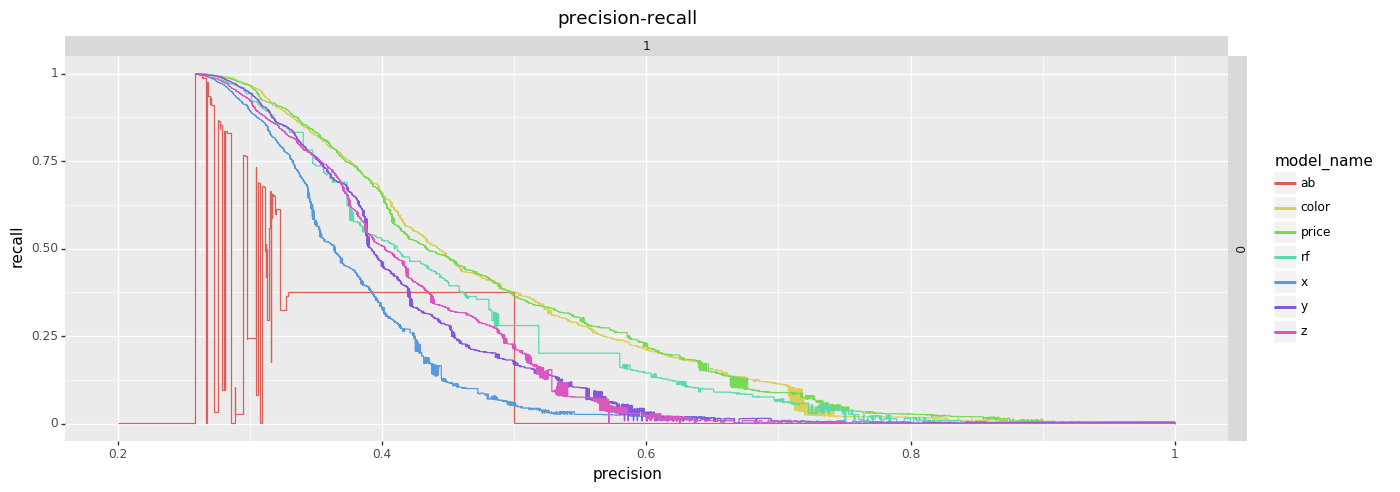

<ggplot: (193855373832)>

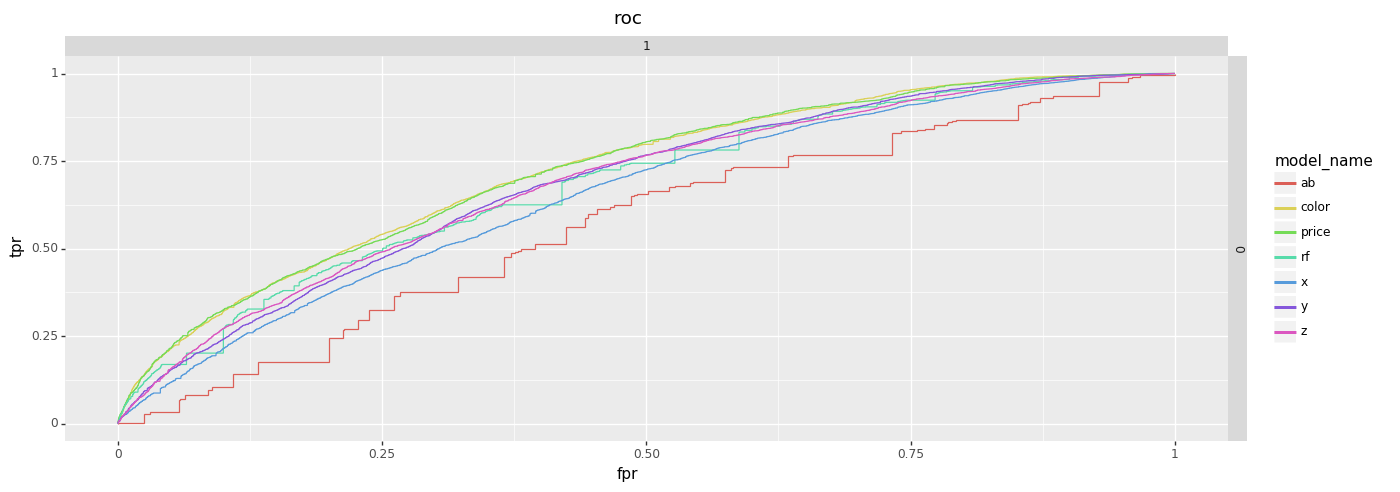

<ggplot: (-9223371842995280636)>

               average_precision
price - 0 - 1              0.481
color - 0 - 1              0.480
rf - 0 - 1                 0.441
z - 0 - 1                  0.418
y - 0 - 1                  0.414
x - 0 - 1                  0.380
ab - 0 - 1                 0.300
               roc_auc
color - 0 - 1    0.723
price - 0 - 1    0.722
rf - 0 - 1       0.692
y - 0 - 1        0.687
z - 0 - 1        0.686
x - 0 - 1        0.655
ab - 0 - 1       0.585


In [30]:
c1.summary_big(simulation_name, pos_label, cv_n, hold_n, by_var)

# Łączenie modeli

## Agregacja wynikow

Zakładam że mam dwa różne modele na rozłączych zbiorach danych i chce uzyskać ja nich zagregowaną macierz pomysłek i scory

### Model 1

In [33]:
# zmienne
y_var = ['target_multi_label']        # zmianna objasniana
x_var_num = ['y', 'z']                # zmienne objasniajace numeryczne
x_var_cat = ['color','clarity'] # zmienne objasniajace kategoryczne
x_var = x_var_num + x_var_cat         # wszystkie zmienna objasniajace

# zbior danych dla pierwsego modelu
data_model_1 = data.iloc[1:10000,:]

# podzial na zbioru 'data' na train i test
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(data_model_1[x_var], data_model_1[y_var], test_size=0.33)

# reset indexow na zbiorach
x_train = x_train.reset_index(drop=True)
x_test  = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

# umieszczenie w jednym zbiorze zmiennych objasniajacych i zmiennej objasnianej
train_set = pd.concat([x_train, y_train], axis = 1)
test_set  = pd.concat([x_test, y_test], axis = 1)

# zamiana zmiennej objasnianej na typ 'str'
train_set[y_var] = train_set[y_var].astype(str)
test_set[y_var]  = test_set[y_var].astype(str)

In [34]:
# Parametry symulacji do UCZENIA MODELI
simulation_name        = 'symulacja_1_do_agreg' # unikalna nazwa symulacji
simulation_description = 'symulacja pierwsza do agregacji' # opis symulacji
models_list            = {'rf':models_base['rf'], 'cat':models_base['cat']} # slownik modeli do nauki wybranych z listy 'model_base'
cv_n                   = None     # walidacja krzyzowa: ilosc k-foldow na walidacji krzyzowej (None jezeli nie chcemy walidacji krzyzowej)
hold_n                 = None     # walidacja holdout: ilosc samplow na holdout (None jezeli nie chcemy walidacji holdout)
hold_train_sample_size = 0.1   # walidacja holdout: wielkosc losowanego zbioru train na holdout
hold_test_sample_size  = 0.1   # walidacja holdout: wielkosc losowanego zbioru test na holdout
fip_n                  = None     # walidacja feature importatnce permutation:  ilosc samplow (None jezeli nie chcemy. Jezeli chcemy, zalecana wartosc to 1)
model_fip              = RandomForestClassifier(n_estimators=20, max_depth=7) # walidacja feature importatnce permutation: okreslenie modelu
by_var                 = None # walidacja segmentacyjna: zmienna po ktore wykonac segmentacje by_var (None jezeli nie chcemy)
pos_label              = '1'   # ktory label zmiennej objasnianej jest traktowany jako 'positive'
balancing_method       = None  # metoda balansowania (dostepne: ''over', 'under', 'None')
calibration_method     = None # metoda kalibracji prawdopodobienstwa (dostepne : 'isotonic', 'None')
cat_encoding_method    = 'target' # metoda enkodowania zmiennych kategorycznych (dostepne: 'target', 'None')

# parematry dla PERFORMANCE
thresholds_priori_list ={  'p1':[None,{'0':0.2, '1':0.2, '2':0.2, '3':0.2,'4':0.2}]
      , 'p2':[None,{'0':0.1, '1':0.3, '2':0.2, '3':0.2,'4':0.2}]} # thresholdy i priori dla kazdej kategorii (jezeli damy 'None' dla thresholdow przypisywanie odbywa sie poprzez max(pd))


# inicjalizacja nowego obiektu do symulacji (na tym obiekcie bedziemy wykonywac kolejne symulacje, więc kolejne inicjalizacje nie sa potrzebne)
c1 = classification_model()

# UCZENIE MODELI (obliczane tylko prawdopodobienstwa)
c1.simulation(  train_set = train_set, test_set = test_set, y_var = y_var, x_var_num = x_var_num, x_var_cat = x_var_cat, by_var=by_var
              , balancing_method=balancing_method
              , cv_n=cv_n, fip_n=fip_n, hold_n = hold_n, hold_train_sample_size = hold_train_sample_size, hold_test_sample_size = hold_test_sample_size
              , data_check=True, models_list=models_list, correlation = True, model_fip = RandomForestClassifier(n_estimators=30, max_depth=7)
              , simulation_name = simulation_name, description = simulation_description)

# PERFORMANCE (na uzyskane w poprzednim kroku prawdopodobienstwa nadkladamy thresholdy i liczymy scory confusion matrix itp.)
c1.performance_multi_thr(thresholds_priori_list = thresholds_priori_list, simulation_name = simulation_name, pos_label = '1' )

# zapisanie wynikow na dysk
c1.save_results(path = r'C:\Users\memy\OneDrive\Pulpit\1_Programs_and_programing\DS_proj\classification_python\results\symulacja_1', override = True)


(6699, 5)
(3300, 5)
(6699, 5)
(3300, 5)
full 0
full 1


You should provide test set for use best model. use_best_model parameter has been switched to false value.


feature_importance
None
{'0': 0.2, '1': 0.2, '2': 0.2, '3': 0.2, '4': 0.2}
THRESHOLD
None
('symulacja_1_do_agreg', 'cat', 'test', 'full', 0, '_', 0, 'p1')
('symulacja_1_do_agreg', 'cat', 'train', 'full', 0, '_', 0, 'p1')
('symulacja_1_do_agreg', 'rf', 'test', 'full', 0, '_', 0, 'p1')
('symulacja_1_do_agreg', 'rf', 'train', 'full', 0, '_', 0, 'p1')
None
{'0': 0.1, '1': 0.3, '2': 0.2, '3': 0.2, '4': 0.2}
THRESHOLD
None
('symulacja_1_do_agreg', 'cat', 'test', 'full', 0, '_', 0, 'p2')
('symulacja_1_do_agreg', 'cat', 'train', 'full', 0, '_', 0, 'p2')
('symulacja_1_do_agreg', 'rf', 'test', 'full', 0, '_', 0, 'p2')
('symulacja_1_do_agreg', 'rf', 'train', 'full', 0, '_', 0, 'p2')


### Model 2

In [40]:
# zmienne
y_var = ['target_multi_label']        # zmianna objasniana
x_var_num = ['price', 'x']  # zmienne objasniajace numeryczne
x_var_cat = ['color','clarity','cut'] # zmienne objasniajace kategoryczne
x_var = x_var_num + x_var_cat         # wszystkie zmienna objasniajace

# zbior danych dla drugiego modelu
data_model_2 = data.iloc[10000:20000,:]

# podzial na zbioru 'data' na train i test
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(data_model_2[x_var], data_model_2[y_var], test_size=0.33)

# reset indexow na zbiorach
x_train = x_train.reset_index(drop=True)
x_test  = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

# umieszczenie w jednym zbiorze zmiennych objasniajacych i zmiennej objasnianej
train_set = pd.concat([x_train, y_train], axis = 1)
test_set  = pd.concat([x_test, y_test], axis = 1)

# zamiana zmiennej objasnianej na typ 'str'
train_set[y_var] = train_set[y_var].astype(str)
test_set[y_var]  = test_set[y_var].astype(str)

In [36]:
# Parametry symulacji do UCZENIA MODELI
simulation_name        = 'symulacja_2_do_agreg' # unikalna nazwa symulacji
simulation_description = 'symulacja druga do agregacji' # opis symulacji
models_list            = {'rf':models_base['rf'], 'cat':models_base['cat']} # slownik modeli do nauki wybranych z listy 'model_base'
cv_n                   = None     # walidacja krzyzowa: ilosc k-foldow na walidacji krzyzowej (None jezeli nie chcemy walidacji krzyzowej)
hold_n                 = None     # walidacja holdout: ilosc samplow na holdout (None jezeli nie chcemy walidacji holdout)
hold_train_sample_size = 0.1   # walidacja holdout: wielkosc losowanego zbioru train na holdout
hold_test_sample_size  = 0.1   # walidacja holdout: wielkosc losowanego zbioru test na holdout
fip_n                  = None     # walidacja feature importatnce permutation:  ilosc samplow (None jezeli nie chcemy. Jezeli chcemy, zalecana wartosc to 1)
model_fip              = RandomForestClassifier(n_estimators=20, max_depth=7) # walidacja feature importatnce permutation: okreslenie modelu
by_var                 = None # walidacja segmentacyjna: zmienna po ktore wykonac segmentacje by_var (None jezeli nie chcemy)
pos_label              = '1'   # ktory label zmiennej objasnianej jest traktowany jako 'positive'
balancing_method       = None  # metoda balansowania (dostepne: ''over', 'under', 'None')
calibration_method     = None # metoda kalibracji prawdopodobienstwa (dostepne : 'isotonic', 'None')
cat_encoding_method    = 'target' # metoda enkodowania zmiennych kategorycznych (dostepne: 'target', 'None')

# parematry dla PERFORMANCE
thresholds_priori_list ={  'p1':[None,{'0':0.2, '1':0.2, '2':0.2, '3':0.2,'4':0.2}]
      , 'p2':[None,{'0':0.1, '1':0.3, '2':0.2, '3':0.2,'4':0.2}]} # thresholdy i priori dla kazdej kategorii (jezeli damy 'None' dla thresholdow przypisywanie odbywa sie poprzez max(pd))


# inicjalizacja nowego obiektu do symulacji : NIE JEST WYKONYWANA. PRACJEMY DALEJ NA OBIEKCIE W POPRZEDNIEJ SYMULACJI


# UCZENIE MODELI (obliczane tylko prawdopodobienstwa)
c1.simulation(  train_set = train_set, test_set = test_set, y_var = y_var, x_var_num = x_var_num, x_var_cat = x_var_cat, by_var=by_var
              , balancing_method=balancing_method
              , cv_n=cv_n, fip_n=fip_n, hold_n = hold_n, hold_train_sample_size = hold_train_sample_size, hold_test_sample_size = hold_test_sample_size
              , data_check=True, models_list=models_list, correlation = True, model_fip = RandomForestClassifier(n_estimators=30, max_depth=7)
              , simulation_name = simulation_name, description = simulation_description)

# PERFORMANCE (na uzyskane w poprzednim kroku prawdopodobienstwa nadkladamy thresholdy i liczymy scory confusion matrix itp.)
c1.performance_multi_thr(thresholds_priori_list = thresholds_priori_list, simulation_name = simulation_name, pos_label = '1' )

# zapisanie wynikow na dysk
c1.save_results(path = r'C:\Users\memy\OneDrive\Pulpit\1_Programs_and_programing\DS_proj\classification_python\results\symulacja_1', override = True)


(6700, 6)
(3300, 6)
(6700, 6)
(3300, 6)
full 0
full 1


You should provide test set for use best model. use_best_model parameter has been switched to false value.


feature_importance
None
{'0': 0.2, '1': 0.2, '2': 0.2, '3': 0.2, '4': 0.2}
THRESHOLD
None
('symulacja_2_do_agreg', 'cat', 'test', 'full', 0, '_', 0, 'p1')
('symulacja_2_do_agreg', 'cat', 'train', 'full', 0, '_', 0, 'p1')
('symulacja_2_do_agreg', 'rf', 'test', 'full', 0, '_', 0, 'p1')
('symulacja_2_do_agreg', 'rf', 'train', 'full', 0, '_', 0, 'p1')
None
{'0': 0.1, '1': 0.3, '2': 0.2, '3': 0.2, '4': 0.2}
THRESHOLD
None
('symulacja_2_do_agreg', 'cat', 'test', 'full', 0, '_', 0, 'p2')
('symulacja_2_do_agreg', 'cat', 'train', 'full', 0, '_', 0, 'p2')
('symulacja_2_do_agreg', 'rf', 'test', 'full', 0, '_', 0, 'p2')
('symulacja_2_do_agreg', 'rf', 'train', 'full', 0, '_', 0, 'p2')


### Połączone wyniki modeli 1 i 2

In [52]:
c1.scores_cf_agg_full(simulation_params = [['symulacja_1_do_agreg','cat','p1'], ['symulacja_2_do_agreg','rf','p2']], if_automatic=0, pos_label = pos_label)

# nazwa nowgo polaczonego performance
simulation_new_name = '_' + 'symulacja_1_do_agreg' + '_' +  'symulacja_2_do_agreg'

h('target distribution, confussion matrix, scores and feature importance')
c1.fast_conf_matrix_scores(simulation_name = simulation_new_name)


[None,
 None,
 None,
 None,
 None,
 'recall = TP / TP + FN;   precision = TP / (TP + FP);    f1 = ( 2*TP ) / (2*TP + FP + FN );   balanced_accuracy = (TP/(TP+FN) + TN/(TN+FP)) / 2 ']

## Usrednianie prawdopodobienstw

Jezeli usredniam miedzy roznymi symulacjami to zakladam ze byly one zbudowane na zbiorach z tymi samymi obserwacjami ktore byly tak samo posortowane

### Model 1

In [53]:
# zmienne
y_var = ['target_multi_label']        # zmianna objasniana
x_var_num = ['price', 'table']        # zmienne objasniajace numeryczne
x_var_cat = ['color','clarity','cut'] # zmienne objasniajace kategoryczne
x_var = x_var_num + x_var_cat         # wszystkie zmienna objasniajace

# podzial na zbioru 'data' na train i test
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(data[x_var], data[y_var], test_size=0.33)

# reset indexow na zbiorach
x_train = x_train.reset_index(drop=True)
x_test  = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

# umieszczenie w jednym zbiorze zmiennych objasniajacych i zmiennej objasnianej
train_set = pd.concat([x_train, y_train], axis = 1)
test_set  = pd.concat([x_test, y_test], axis = 1)

# zamiana zmiennej objasnianej na typ 'str'
train_set[y_var] = train_set[y_var].astype(str)
test_set[y_var]  = test_set[y_var].astype(str)

In [54]:
# Parametry symulacji do UCZENIA MODELI
simulation_name        = 'symulacja_1_do_usredn' # unikalna nazwa symulacji
simulation_description = 'symulacja pierwsza do usredniania' # opis symulacji
models_list            = {'rf':models_base['rf'], 'ab':models_base['ab']} # slownik modeli do nauki wybranych z listy 'model_base'
cv_n                   = 4     # walidacja krzyzowa: ilosc k-foldow na walidacji krzyzowej (None jezeli nie chcemy walidacji krzyzowej)
hold_n                 = 4     # walidacja holdout: ilosc samplow na holdout (None jezeli nie chcemy walidacji holdout)
hold_train_sample_size = 0.1   # walidacja holdout: wielkosc losowanego zbioru train na holdout
hold_test_sample_size  = 0.1   # walidacja holdout: wielkosc losowanego zbioru test na holdout
fip_n                  = 1     # walidacja feature importatnce permutation:  ilosc samplow (None jezeli nie chcemy. Jezeli chcemy, zalecana wartosc to 1)
model_fip              = RandomForestClassifier(n_estimators=20, max_depth=7) # walidacja feature importatnce permutation: okreslenie modelu
by_var                 = 'cut' # walidacja segmentacyjna: zmienna po ktore wykonac segmentacje by_var (None jezeli nie chcemy)
pos_label              = '1'   # ktory label zmiennej objasnianej jest traktowany jako 'positive'
balancing_method       = None  # metoda balansowania (dostepne: ''over', 'under', 'None')
calibration_method     = None # metoda kalibracji prawdopodobienstwa (dostepne : 'isotonic', 'None')
cat_encoding_method    = 'target' # metoda enkodowania zmiennych kategorycznych (dostepne: 'target', 'None')

# parematry dla PERFORMANCE
thresholds_priori_list ={  'p1':[None,{'0':0.2, '1':0.2, '2':0.2, '3':0.2,'4':0.2}]
      , 'p2':[None,{'0':0.1, '1':0.3, '2':0.2, '3':0.2,'4':0.2}]} # thresholdy i priori dla kazdej kategorii (jezeli damy 'None' dla thresholdow przypisywanie odbywa sie poprzez max(pd))


# inicjalizacja nowego obiektu do symulacji (na tym obiekcie bedziemy wykonywac kolejne symulacje, więc kolejne inicjalizacje nie sa potrzebne)
c1 = classification_model()


# UCZENIE MODELI (obliczane tylko prawdopodobienstwa)
c1.simulation(  train_set = train_set, test_set = test_set, y_var = y_var, x_var_num = x_var_num, x_var_cat = x_var_cat, by_var=by_var
              , balancing_method=balancing_method
              , cv_n=cv_n, fip_n=fip_n, hold_n = hold_n, hold_train_sample_size = hold_train_sample_size, hold_test_sample_size = hold_test_sample_size
              , data_check=True, models_list=models_list, correlation = True, model_fip = RandomForestClassifier(n_estimators=30, max_depth=7)
              , simulation_name = simulation_name, description = simulation_description)

# PERFORMANCE (na uzyskane w poprzednim kroku prawdopodobienstwa nadkladamy thresholdy i liczymy scory confusion matrix itp.)
c1.performance_multi_thr(thresholds_priori_list = thresholds_priori_list, simulation_name = simulation_name, pos_label = '1' )

# zapisanie wynikow na dysk
c1.save_results(path = r'C:\Users\memy\OneDrive\Pulpit\1_Programs_and_programing\DS_proj\classification_python\results\symulacja_1', override = True)


(36139, 6)
(17801, 6)
(36139, 6)
(17801, 6)
cv 0
0
(27104, 5)
(9035, 5)
(17801, 5)
1
(27104, 5)
(9035, 5)
(17801, 5)
2
(27104, 5)
(9035, 5)
(17801, 5)
3
(27105, 5)
(9034, 5)
(17801, 5)
cv 1
0
(27104, 5)
(9035, 5)
(17801, 5)
1
(27104, 5)
(9035, 5)
(17801, 5)
2
(27104, 5)
(9035, 5)
(17801, 5)
3
(27105, 5)
(9034, 5)
(17801, 5)
hold 0
(3613, 5)
(3614, 5)
(17801, 5)
(3613, 5)
(3614, 5)
(17801, 5)
(3613, 5)
(3614, 5)
(17801, 5)
(3613, 5)
(3614, 5)
(17801, 5)
hold 1
(3613, 5)
(3614, 5)
(17801, 5)
(3613, 5)
(3614, 5)
(17801, 5)
(3613, 5)
(3614, 5)
(17801, 5)
(3613, 5)
(3614, 5)
(17801, 5)
by_var 0
(1085, 1)
(525, 1)
(17801, 1)
(3272, 1)
(1634, 1)
(17801, 1)
(14499, 1)
(7052, 1)
(17801, 1)
(9158, 1)
(4633, 1)
(17801, 1)
(8125, 1)
(3957, 1)
(17801, 1)
by_var 1
(1085, 1)
(525, 1)
(17801, 1)
(3272, 1)
(1634, 1)
(17801, 1)
(14499, 1)
(7052, 1)
(17801, 1)
(9158, 1)
(4633, 1)
(17801, 1)
(8125, 1)
(3957, 1)
(17801, 1)
full 0
full 1
feature_importance
fip 0
None
{'0': 0.2, '1': 0.2, '2': 0.2, '3': 0.2,

('symulacja_1_do_usredn', 'ab', 'train', 'full', 0, '_', 0, 'p2')
('symulacja_1_do_usredn', 'ab', 'train', 'hold', 0, '_', 0, 'p2')
('symulacja_1_do_usredn', 'ab', 'train', 'hold', 1, '_', 0, 'p2')
('symulacja_1_do_usredn', 'ab', 'train', 'hold', 2, '_', 0, 'p2')
('symulacja_1_do_usredn', 'ab', 'train', 'hold', 3, '_', 0, 'p2')
('symulacja_1_do_usredn', 'ab', 'valid', 'by_var', 0, 'Fair', 0, 'p2')
('symulacja_1_do_usredn', 'ab', 'valid', 'by_var', 1, 'Good', 0, 'p2')
('symulacja_1_do_usredn', 'ab', 'valid', 'by_var', 2, 'Ideal', 0, 'p2')
('symulacja_1_do_usredn', 'ab', 'valid', 'by_var', 3, 'Premium', 0, 'p2')
('symulacja_1_do_usredn', 'ab', 'valid', 'by_var', 4, 'Very Good', 0, 'p2')
('symulacja_1_do_usredn', 'ab', 'valid', 'cv', 0, '_', 0, 'p2')
('symulacja_1_do_usredn', 'ab', 'valid', 'cv', 1, '_', 0, 'p2')
('symulacja_1_do_usredn', 'ab', 'valid', 'cv', 2, '_', 0, 'p2')
('symulacja_1_do_usredn', 'ab', 'valid', 'cv', 3, '_', 0, 'p2')
('symulacja_1_do_usredn', 'ab', 'valid', 'hold', 0

### Model 2 

In [55]:
# zmienne
y_var = ['target_multi_label']        # zmianna objasniana
x_var_num = ['y', 'z']                # zmienne objasniajace numeryczne
x_var_cat = ['color','clarity','cut'] # zmienne objasniajace kategoryczne
x_var = x_var_num + x_var_cat         # wszystkie zmienna objasniajace

# podzial na zbioru 'data' na train i test
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(data[x_var], data[y_var], test_size=0.33)

# reset indexow na zbiorach
x_train = x_train.reset_index(drop=True)
x_test  = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

# umieszczenie w jednym zbiorze zmiennych objasniajacych i zmiennej objasnianej
train_set = pd.concat([x_train, y_train], axis = 1)
test_set  = pd.concat([x_test, y_test], axis = 1)

# zamiana zmiennej objasnianej na typ 'str'
train_set[y_var] = train_set[y_var].astype(str)
test_set[y_var]  = test_set[y_var].astype(str)

In [56]:
# Parametry symulacji do UCZENIA MODELI
simulation_name        = 'symulacja_2_do_usredn' # unikalna nazwa symulacji
simulation_description = 'symulacja druga do usredniania' # opis symulacji
models_list            = {'rf':models_base['rf'], 'ab':models_base['ab']} # slownik modeli do nauki wybranych z listy 'model_base'
cv_n                   = 4     # walidacja krzyzowa: ilosc k-foldow na walidacji krzyzowej (None jezeli nie chcemy walidacji krzyzowej)
hold_n                 = 4     # walidacja holdout: ilosc samplow na holdout (None jezeli nie chcemy walidacji holdout)
hold_train_sample_size = 0.1   # walidacja holdout: wielkosc losowanego zbioru train na holdout
hold_test_sample_size  = 0.1   # walidacja holdout: wielkosc losowanego zbioru test na holdout
fip_n                  = 1     # walidacja feature importatnce permutation:  ilosc samplow (None jezeli nie chcemy. Jezeli chcemy, zalecana wartosc to 1)
model_fip              = RandomForestClassifier(n_estimators=20, max_depth=7) # walidacja feature importatnce permutation: okreslenie modelu
by_var                 = 'cut' # walidacja segmentacyjna: zmienna po ktore wykonac segmentacje by_var (None jezeli nie chcemy)
pos_label              = '1'   # ktory label zmiennej objasnianej jest traktowany jako 'positive'
balancing_method       = None  # metoda balansowania (dostepne: ''over', 'under', 'None')
calibration_method     = None # metoda kalibracji prawdopodobienstwa (dostepne : 'isotonic', 'None')
cat_encoding_method    = 'target' # metoda enkodowania zmiennych kategorycznych (dostepne: 'target', 'None')

# parematry dla PERFORMANCE
thresholds_priori_list ={  'p1':[None,{'0':0.2, '1':0.2, '2':0.2, '3':0.2,'4':0.2}]
      , 'p2':[None,{'0':0.1, '1':0.3, '2':0.2, '3':0.2,'4':0.2}]} # thresholdy i priori dla kazdej kategorii (jezeli damy 'None' dla thresholdow przypisywanie odbywa sie poprzez max(pd))


# inicjalizacja nowego obiektu do symulacji : NIE JEST WYKONYWANA. PRACJEMY DALEJ NA OBIEKCIE W POPRZEDNIEJ SYMULACJI


# UCZENIE MODELI (obliczane tylko prawdopodobienstwa)
c1.simulation(  train_set = train_set, test_set = test_set, y_var = y_var, x_var_num = x_var_num, x_var_cat = x_var_cat, by_var=by_var
              , balancing_method=balancing_method
              , cv_n=cv_n, fip_n=fip_n, hold_n = hold_n, hold_train_sample_size = hold_train_sample_size, hold_test_sample_size = hold_test_sample_size
              , data_check=True, models_list=models_list, correlation = True, model_fip = RandomForestClassifier(n_estimators=30, max_depth=7)
              , simulation_name = simulation_name, description = simulation_description)

# PERFORMANCE (na uzyskane w poprzednim kroku prawdopodobienstwa nadkladamy thresholdy i liczymy scory confusion matrix itp.)
c1.performance_multi_thr(thresholds_priori_list = thresholds_priori_list, simulation_name = simulation_name, pos_label = '1' )

# zapisanie wynikow na dysk
c1.save_results(path = r'C:\Users\memy\OneDrive\Pulpit\1_Programs_and_programing\DS_proj\classification_python\results\symulacja_1', override = True)


(36139, 6)
(17801, 6)
(36139, 6)
(17801, 6)
cv 0
0
(27104, 5)
(9035, 5)
(17801, 5)
1
(27104, 5)
(9035, 5)
(17801, 5)
2
(27104, 5)
(9035, 5)
(17801, 5)
3
(27105, 5)
(9034, 5)
(17801, 5)
cv 1
0
(27104, 5)
(9035, 5)
(17801, 5)
1
(27104, 5)
(9035, 5)
(17801, 5)
2
(27104, 5)
(9035, 5)
(17801, 5)
3
(27105, 5)
(9034, 5)
(17801, 5)
hold 0
(3613, 5)
(3614, 5)
(17801, 5)
(3613, 5)
(3614, 5)
(17801, 5)
(3613, 5)
(3614, 5)
(17801, 5)
(3613, 5)
(3614, 5)
(17801, 5)
hold 1
(3613, 5)
(3614, 5)
(17801, 5)
(3613, 5)
(3614, 5)
(17801, 5)
(3613, 5)
(3614, 5)
(17801, 5)
(3613, 5)
(3614, 5)
(17801, 5)
by_var 0
(1037, 1)
(573, 1)
(17801, 1)
(3274, 1)
(1632, 1)
(17801, 1)
(14444, 1)
(7107, 1)
(17801, 1)
(9241, 1)
(4550, 1)
(17801, 1)
(8143, 1)
(3939, 1)
(17801, 1)
by_var 1
(1037, 1)
(573, 1)
(17801, 1)
(3274, 1)
(1632, 1)
(17801, 1)
(14444, 1)
(7107, 1)
(17801, 1)
(9241, 1)
(4550, 1)
(17801, 1)
(8143, 1)
(3939, 1)
(17801, 1)
full 0
full 1
feature_importance
fip 0
None
{'0': 0.2, '1': 0.2, '2': 0.2, '3': 0.2,

('symulacja_2_do_usredn', 'ab', 'train', 'full', 0, '_', 0, 'p2')
('symulacja_2_do_usredn', 'ab', 'train', 'hold', 0, '_', 0, 'p2')
('symulacja_2_do_usredn', 'ab', 'train', 'hold', 1, '_', 0, 'p2')
('symulacja_2_do_usredn', 'ab', 'train', 'hold', 2, '_', 0, 'p2')
('symulacja_2_do_usredn', 'ab', 'train', 'hold', 3, '_', 0, 'p2')
('symulacja_2_do_usredn', 'ab', 'valid', 'by_var', 0, 'Fair', 0, 'p2')
('symulacja_2_do_usredn', 'ab', 'valid', 'by_var', 1, 'Good', 0, 'p2')
('symulacja_2_do_usredn', 'ab', 'valid', 'by_var', 2, 'Ideal', 0, 'p2')
('symulacja_2_do_usredn', 'ab', 'valid', 'by_var', 3, 'Premium', 0, 'p2')
('symulacja_2_do_usredn', 'ab', 'valid', 'by_var', 4, 'Very Good', 0, 'p2')
('symulacja_2_do_usredn', 'ab', 'valid', 'cv', 0, '_', 0, 'p2')
('symulacja_2_do_usredn', 'ab', 'valid', 'cv', 1, '_', 0, 'p2')
('symulacja_2_do_usredn', 'ab', 'valid', 'cv', 2, '_', 0, 'p2')
('symulacja_2_do_usredn', 'ab', 'valid', 'cv', 3, '_', 0, 'p2')
('symulacja_2_do_usredn', 'ab', 'valid', 'hold', 0

### Usrednienie

In [57]:
# lista z parami : (1) nazwa_symulacji - (2) model


list_to_stack = [['symulacja_1_do_usredn','rf'], ['symulacja_2_do_usredn','ab']]


new_simulation_name = 'sim_new'

c1.stacking_between_sim(simulation_new_name = new_simulation_name, simulation_params = list_to_stack, method = 'mean')

c1.performance(simulation_name=new_simulation_name, threshold=threshold, priori =  None)



THRESHOLD
{'0': 0.5, '1': 0.5}


[None,
 None,
 None,
 None,
 None,
 'recall = TP / TP + FN;   precision = TP / (TP + FP);    f1 = ( 2*TP ) / (2*TP + FP + FN );   balanced_accuracy = (TP/(TP+FN) + TN/(TN+FP)) / 2 ']

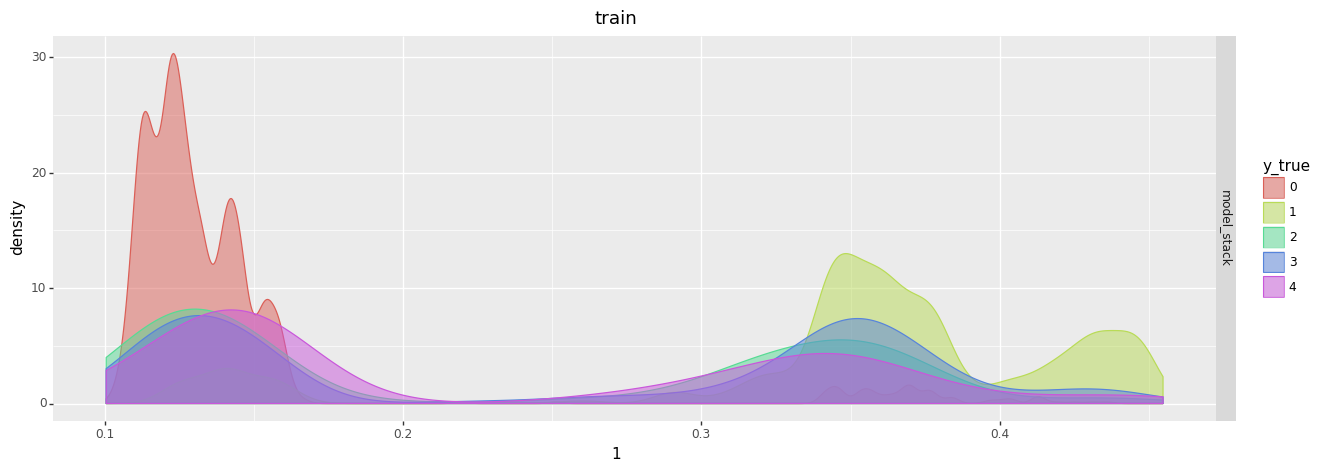

<ggplot: (193859354155)>

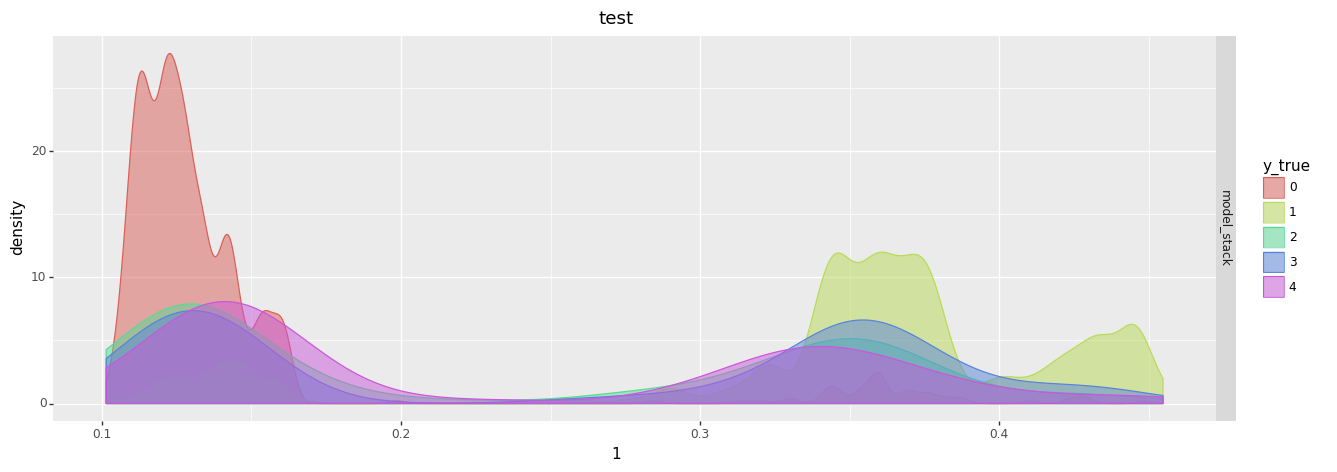

<ggplot: (193859209613)>

In [58]:

simulation_name = 'sim_new'


h('target distribution, confussion matrix, scores and feature importance')
c1.fast_conf_matrix_scores(simulation_name = simulation_name)
h('density plots')
c1.fast_dens_plot(simulation_name=simulation_name, sample_type = ['full'])


## Stacking

### Modele

In [115]:
# zmienne
y_var = ['target_multi_label']        # zmianna objasniana
x_var_num = ['price', 'table']        # zmienne objasniajace numeryczne
x_var_cat = ['color','clarity','cut'] # zmienne objasniajace kategoryczne
x_var = x_var_num + x_var_cat         # wszystkie zmienna objasniajace

# podzial na zbioru 'data' na train i test
data1 = data.iloc[1:5000,:]
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(data1[x_var], data1[y_var], test_size=0.33)

# reset indexow na zbiorach
x_train = x_train.reset_index(drop=True)
x_test  = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

# umieszczenie w jednym zbiorze zmiennych objasniajacych i zmiennej objasnianej
train_set = pd.concat([x_train, y_train], axis = 1)
test_set  = pd.concat([x_test, y_test], axis = 1)

# zamiana zmiennej objasnianej na typ 'str'
train_set[y_var] = train_set[y_var].astype(str)
test_set[y_var]  = test_set[y_var].astype(str)

In [116]:
# Parametry symulacji do UCZENIA MODELI
simulation_name        = 'symulacja_stack' # unikalna nazwa symulacji
simulation_description = 'symulacja do stackingu' # opis symulacji
models_list            = {'rf':models_base['rf'], 'ab':models_base['ab']} # slownik modeli do nauki wybranych z listy 'model_base'
cv_n                   = 4     # walidacja krzyzowa: ilosc k-foldow na walidacji krzyzowej (None jezeli nie chcemy walidacji krzyzowej)
hold_n                 = 4     # walidacja holdout: ilosc samplow na holdout (None jezeli nie chcemy walidacji holdout)
hold_train_sample_size = 0.1   # walidacja holdout: wielkosc losowanego zbioru train na holdout
hold_test_sample_size  = 0.1   # walidacja holdout: wielkosc losowanego zbioru test na holdout
fip_n                  = 1     # walidacja feature importatnce permutation:  ilosc samplow (None jezeli nie chcemy. Jezeli chcemy, zalecana wartosc to 1)
model_fip              = RandomForestClassifier(n_estimators=20, max_depth=7) # walidacja feature importatnce permutation: okreslenie modelu
by_var                 = 'cut' # walidacja segmentacyjna: zmienna po ktore wykonac segmentacje by_var (None jezeli nie chcemy)
pos_label              = '1'   # ktory label zmiennej objasnianej jest traktowany jako 'positive'
balancing_method       = None  # metoda balansowania (dostepne: ''over', 'under', 'None')
calibration_method     = None # metoda kalibracji prawdopodobienstwa (dostepne : 'isotonic', 'None')
cat_encoding_method    = 'target' # metoda enkodowania zmiennych kategorycznych (dostepne: 'target', 'None')

# parematry dla PERFORMANCE
thresholds_priori_list ={  'p1':[None,{'0':0.2, '1':0.2, '2':0.2, '3':0.2,'4':0.2}]
      , 'p2':[None,{'0':0.1, '1':0.3, '2':0.2, '3':0.2,'4':0.2}]} # thresholdy i priori dla kazdej kategorii (jezeli damy 'None' dla thresholdow przypisywanie odbywa sie poprzez max(pd))


# inicjalizacja nowego obiektu do symulacji (na tym obiekcie bedziemy wykonywac kolejne symulacje, więc kolejne inicjalizacje nie sa potrzebne)
c1 = classification_model()


# UCZENIE MODELI (obliczane tylko prawdopodobienstwa)
c1.simulation(  train_set = train_set, test_set = test_set, y_var = y_var, x_var_num = x_var_num, x_var_cat = x_var_cat, by_var=by_var
              , balancing_method=balancing_method
              , cv_n=cv_n, fip_n=fip_n, hold_n = hold_n, hold_train_sample_size = hold_train_sample_size, hold_test_sample_size = hold_test_sample_size
              , data_check=True, models_list=models_list, correlation = True, model_fip = RandomForestClassifier(n_estimators=30, max_depth=7)
              , simulation_name = simulation_name, description = simulation_description)

# PERFORMANCE (na uzyskane w poprzednim kroku prawdopodobienstwa nadkladamy thresholdy i liczymy scory confusion matrix itp.)
c1.performance_multi_thr(thresholds_priori_list = thresholds_priori_list, simulation_name = simulation_name, pos_label = '1' )

# zapisanie wynikow na dysk
c1.save_results(path = r'C:\Users\memy\OneDrive\Pulpit\1_Programs_and_programing\DS_proj\classification_python\results\symulacja_1', override = True)


(3349, 6)
(1650, 6)
(3349, 6)
(1650, 6)
cv 0
0
(2511, 5)
(838, 5)
(1650, 5)
1
(2512, 5)
(837, 5)
(1650, 5)
2
(2512, 5)
(837, 5)
(1650, 5)
3
(2512, 5)
(837, 5)
(1650, 5)
cv 1
0
(2511, 5)
(838, 5)
(1650, 5)
1
(2512, 5)
(837, 5)
(1650, 5)
2
(2512, 5)
(837, 5)
(1650, 5)
3
(2512, 5)
(837, 5)
(1650, 5)
hold 0
(334, 5)
(335, 5)
(1650, 5)
(334, 5)
(335, 5)
(1650, 5)
(334, 5)
(335, 5)
(1650, 5)
(334, 5)
(335, 5)
(1650, 5)
hold 1
(334, 5)
(335, 5)
(1650, 5)
(334, 5)
(335, 5)
(1650, 5)
(334, 5)
(335, 5)
(1650, 5)
(334, 5)
(335, 5)
(1650, 5)
by_var 0
(181, 1)
(94, 1)
(1650, 1)
(404, 1)
(183, 1)
(1650, 1)
(1229, 1)
(615, 1)
(1650, 1)
(750, 1)
(344, 1)
(1650, 1)
(785, 1)
(414, 1)
(1650, 1)
by_var 1
(181, 1)
(94, 1)
(1650, 1)
(404, 1)
(183, 1)
(1650, 1)
(1229, 1)
(615, 1)
(1650, 1)
(750, 1)
(344, 1)
(1650, 1)
(785, 1)
(414, 1)
(1650, 1)
full 0
full 1
feature_importance
fip 0
None
{'0': 0.2, '1': 0.2, '2': 0.2, '3': 0.2, '4': 0.2}
THRESHOLD
None
('symulacja_stack', 'ab', 'test', 'by_var', 0, 'Fair', 0

('symulacja_stack', 'ab', 'valid', 'cv', 1, '_', 0, 'p2')
('symulacja_stack', 'ab', 'valid', 'cv', 2, '_', 0, 'p2')
('symulacja_stack', 'ab', 'valid', 'cv', 3, '_', 0, 'p2')
('symulacja_stack', 'ab', 'valid', 'hold', 0, '_', 0, 'p2')
('symulacja_stack', 'ab', 'valid', 'hold', 1, '_', 0, 'p2')
('symulacja_stack', 'ab', 'valid', 'hold', 2, '_', 0, 'p2')
('symulacja_stack', 'ab', 'valid', 'hold', 3, '_', 0, 'p2')
('symulacja_stack', 'rf', 'test', 'by_var', 0, 'Fair', 0, 'p2')
('symulacja_stack', 'rf', 'test', 'by_var', 1, 'Good', 0, 'p2')
('symulacja_stack', 'rf', 'test', 'by_var', 2, 'Ideal', 0, 'p2')
('symulacja_stack', 'rf', 'test', 'by_var', 3, 'Premium', 0, 'p2')
('symulacja_stack', 'rf', 'test', 'by_var', 4, 'Very Good', 0, 'p2')
('symulacja_stack', 'rf', 'test', 'cv', 0, '_', 0, 'p2')
('symulacja_stack', 'rf', 'test', 'cv', 1, '_', 0, 'p2')
('symulacja_stack', 'rf', 'test', 'cv', 2, '_', 0, 'p2')
('symulacja_stack', 'rf', 'test', 'cv', 3, '_', 0, 'p2')
('symulacja_stack', 'rf', 'te

### Stack

In [125]:
# budowannowego zbioru danych

labels = ['0', '1']


var_m1_names = ['0_m1', '1_m1']
var_m2_names = ['0_m2', '1_m2']

# prawdopodobienstwa model 1
pb_model_1_train = c1.probabilities.loc[(c1.probabilities['simulation_name'] == 'symulacja_stack') &
                                  (c1.probabilities['model_name']  == 'rf') &
                                  (c1.probabilities['sample_type'] == 'full') & 
                                  (c1.probabilities['set_type']    == 'train'), labels].reset_index(drop = True)

pb_model_1_train = pb_model_1_train.rename(columns={'0':var_m1_names[0], '1':var_m1_names[1]})

pb_model_1_test = c1.probabilities.loc[(c1.probabilities['simulation_name'] == 'symulacja_stack') &
                                  (c1.probabilities['model_name']  == 'rf') &
                                  (c1.probabilities['sample_type'] == 'full') & 
                                  (c1.probabilities['set_type']    == 'test'), labels].reset_index(drop = True)

pb_model_1_test = pb_model_1_test.rename(columns={'0':var_m1_names[0], '1':var_m1_names[1]})



# prawdopodobienstwa model 2
pb_model_2_train = c1.probabilities.loc[(c1.probabilities['simulation_name'] == 'symulacja_stack') &
                                  (c1.probabilities['model_name']  == 'ab') &
                                  (c1.probabilities['sample_type'] == 'full') & 
                                  (c1.probabilities['set_type']    == 'train'), labels].reset_index(drop = True)

pb_model_2_train = pb_model_2_train.rename(columns={'0':var_m2_names[0], '1':var_m2_names[1]})


pb_model_2_test = c1.probabilities.loc[(c1.probabilities['simulation_name'] == 'symulacja_stack') &
                                  (c1.probabilities['model_name']  == 'ab') &
                                  (c1.probabilities['sample_type'] == 'full') & 
                                  (c1.probabilities['set_type']    == 'test'), labels].reset_index(drop = True)

pb_model_2_test = pb_model_2_test.rename(columns={'0':var_m2_names[0], '1':var_m2_names[1]})



y_train = c1.probabilities.loc[(c1.probabilities['simulation_name'] == 'symulacja_stack') &
                               (c1.probabilities['model_name']  == 'rf') &
                               (c1.probabilities['sample_type'] == 'full') & 
                               (c1.probabilities['set_type']    == 'train'), 'y_true'].reset_index(drop = True)


y_test = c1.probabilities.loc[(c1.probabilities['simulation_name'] == 'symulacja_stack') &
                               (c1.probabilities['model_name']  == 'rf') &
                               (c1.probabilities['sample_type'] == 'full') & 
                               (c1.probabilities['set_type']    == 'test'), 'y_true'].reset_index(drop = True)


y_var = ['y_true']
x_var_num = var_m1_names + var_m2_names
x_var_cat = []
x_var = x_var_num + x_var_cat

train_set = pd.concat([pb_model_1_train, pb_model_2_train, y_train], axis  = 1 )
test_set  = pd.concat([pb_model_1_train, pb_model_2_train, y_train], axis  = 1 )



In [127]:
# Parametry symulacji do UCZENIA MODELI
simulation_name        = 'symulacja pelny stacking' # unikalna nazwa symulacji
simulation_description = 'symulacja pelny stacking' # opis symulacji
models_list            = {'rf':models_base['rf'], 'ab':models_base['ab']} # slownik modeli do nauki wybranych z listy 'model_base'
cv_n                   = 4     # walidacja krzyzowa: ilosc k-foldow na walidacji krzyzowej (None jezeli nie chcemy walidacji krzyzowej)
hold_n                 = 4     # walidacja holdout: ilosc samplow na holdout (None jezeli nie chcemy walidacji holdout)
hold_train_sample_size = 0.1   # walidacja holdout: wielkosc losowanego zbioru train na holdout
hold_test_sample_size  = 0.1   # walidacja holdout: wielkosc losowanego zbioru test na holdout
fip_n                  = 1     # walidacja feature importatnce permutation:  ilosc samplow (None jezeli nie chcemy. Jezeli chcemy, zalecana wartosc to 1)
model_fip              = RandomForestClassifier(n_estimators=20, max_depth=7) # walidacja feature importatnce permutation: okreslenie modelu
by_var                 = None # walidacja segmentacyjna: zmienna po ktore wykonac segmentacje by_var (None jezeli nie chcemy)
pos_label              = '1'   # ktory label zmiennej objasnianej jest traktowany jako 'positive'
balancing_method       = None  # metoda balansowania (dostepne: ''over', 'under', 'None')
calibration_method     = None # metoda kalibracji prawdopodobienstwa (dostepne : 'isotonic', 'None')
cat_encoding_method    = 'target' # metoda enkodowania zmiennych kategorycznych (dostepne: 'target', 'None')

# parematry dla PERFORMANCE
thresholds_priori_list ={  'p1':[None,{'0':0.2, '1':0.2, '2':0.2, '3':0.2,'4':0.2}]
      , 'p2':[None,{'0':0.1, '1':0.3, '2':0.2, '3':0.2,'4':0.2}]} # thresholdy i priori dla kazdej kategorii (jezeli damy 'None' dla thresholdow przypisywanie odbywa sie poprzez max(pd))


# inicjalizacja nowego obiektu do symulacji (na tym obiekcie bedziemy wykonywac kolejne symulacje, więc kolejne inicjalizacje nie sa potrzebne)
c2 = classification_model()


# UCZENIE MODELI (obliczane tylko prawdopodobienstwa)
c2.simulation(  train_set = train_set, test_set = test_set, y_var = y_var, x_var_num = x_var_num, x_var_cat = x_var_cat, by_var=by_var
              , balancing_method=balancing_method
              , cv_n=cv_n, fip_n=fip_n, hold_n = hold_n, hold_train_sample_size = hold_train_sample_size, hold_test_sample_size = hold_test_sample_size
              , data_check=True, models_list=models_list, correlation = True, model_fip = RandomForestClassifier(n_estimators=30, max_depth=7)
              , simulation_name = simulation_name, description = simulation_description)

# PERFORMANCE (na uzyskane w poprzednim kroku prawdopodobienstwa nadkladamy thresholdy i liczymy scory confusion matrix itp.)
c2.performance_multi_thr(thresholds_priori_list = thresholds_priori_list, simulation_name = simulation_name, pos_label = '1' )

# zapisanie wynikow na dysk
c2.save_results(path = r'C:\Users\memy\OneDrive\Pulpit\1_Programs_and_programing\DS_proj\classification_python\results\symulacja_1', override = True)


(3349, 5)
(3349, 5)
(3349, 5)
(3349, 5)
cv 0
0
(2511, 5)
(838, 5)
(3349, 5)
1
(2512, 5)
(837, 5)
(3349, 5)
2
(2512, 5)
(837, 5)
(3349, 5)
3
(2512, 5)
(837, 5)
(3349, 5)
cv 1
0
(2511, 5)
(838, 5)
(3349, 5)
1
(2512, 5)
(837, 5)
(3349, 5)
2
(2512, 5)
(837, 5)
(3349, 5)
3
(2512, 5)
(837, 5)
(3349, 5)
hold 0
(334, 5)
(335, 5)
(3349, 5)
(334, 5)
(335, 5)
(3349, 5)
(334, 5)
(335, 5)
(3349, 5)
(334, 5)
(335, 5)
(3349, 5)
hold 1
(334, 5)
(335, 5)
(3349, 5)
(334, 5)
(335, 5)
(3349, 5)
(334, 5)
(335, 5)
(3349, 5)
(334, 5)
(335, 5)
(3349, 5)
full 0
full 1
feature_importance
fip 0
None
{'0': 0.2, '1': 0.2, '2': 0.2, '3': 0.2, '4': 0.2}
THRESHOLD
None
('symulacja pelny stacking', 'ab', 'test', 'cv', 0, '_', 0, 'p1')
('symulacja pelny stacking', 'ab', 'test', 'cv', 1, '_', 0, 'p1')
('symulacja pelny stacking', 'ab', 'test', 'cv', 2, '_', 0, 'p1')
('symulacja pelny stacking', 'ab', 'test', 'cv', 3, '_', 0, 'p1')
('symulacja pelny stacking', 'ab', 'test', 'full', 0, '_', 0, 'p1')
('symulacja pelny stac

simulation_name               description  x_n  y_name  \
0  symulacja pelny stacking  symulacja pelny stacking    4  y_true   

        y_labels                   x_num x_cat cat_encoding balancing  \
0  0, 1, 2, 3, 4  0_m1, 1_m1, 0_m2, 1_m2             target      None   

  calibration     simulation_start       simulation_end pos_label  priori  \
0        None  2020-06-13 15:57:33  2020-06-13 15:57:42         1     NaN   

   threshold    performance start      performance end threshold_priori_id  
0        NaN  2020-06-13 15:57:51  2020-06-13 15:58:01                  p2

[None,
 None,
 None,
 None,
 None,
 'recall = TP / TP + FN;   precision = TP / (TP + FP);    f1 = ( 2*TP ) / (2*TP + FP + FN );   balanced_accuracy = (TP/(TP+FN) + TN/(TN+FP)) / 2 ']

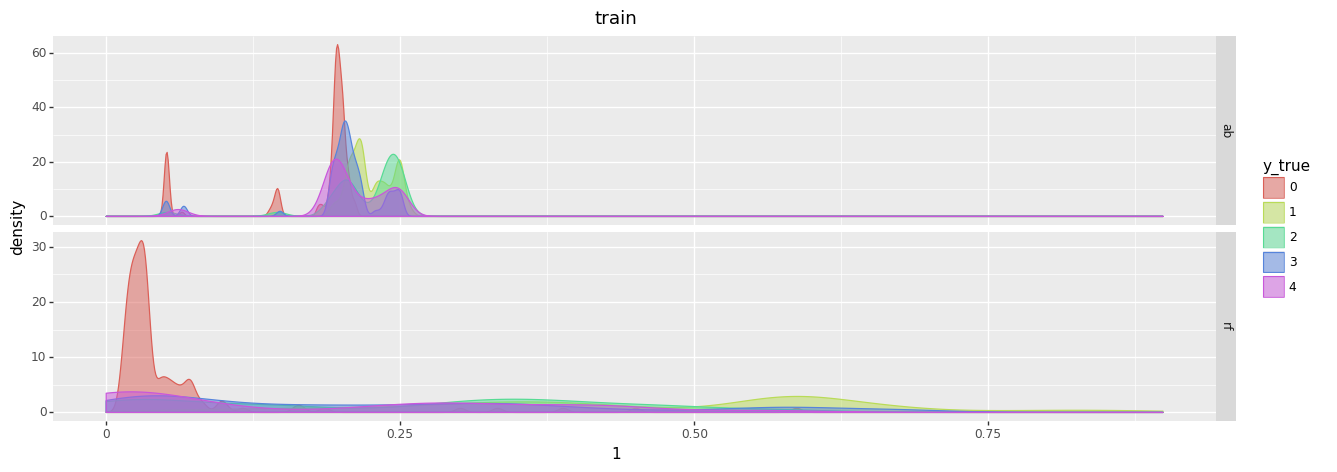

<ggplot: (193873228008)>

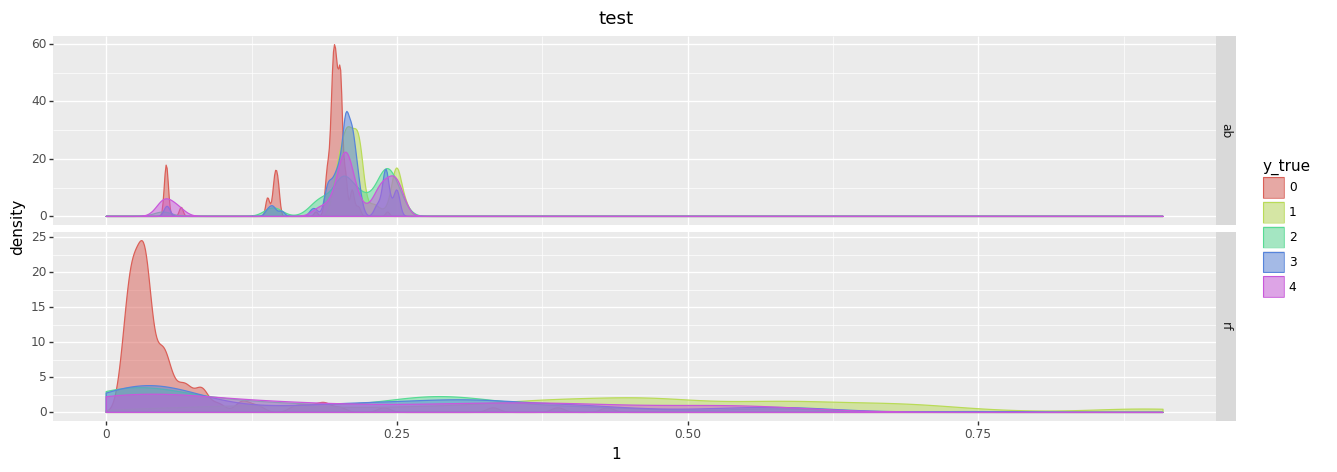

<ggplot: (-9223371842995421240)>

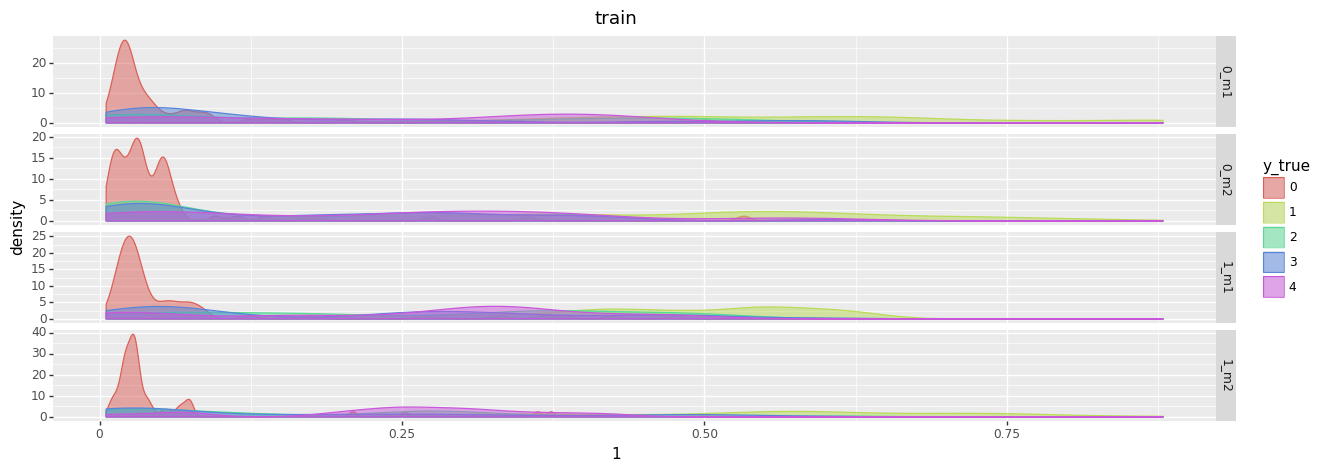

<ggplot: (-9223371842983836847)>

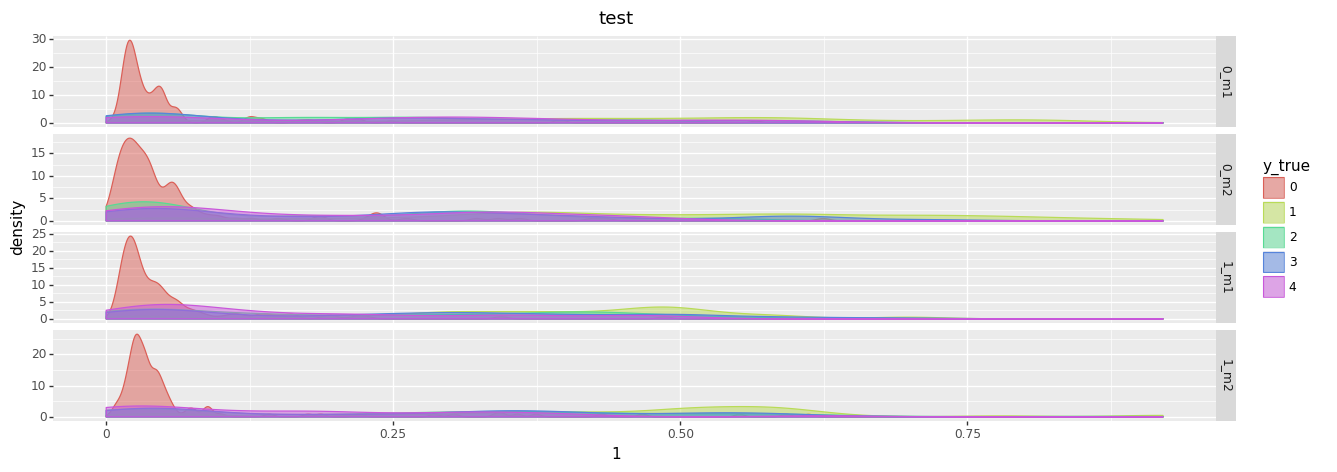

<ggplot: (-9223371842990760220)>

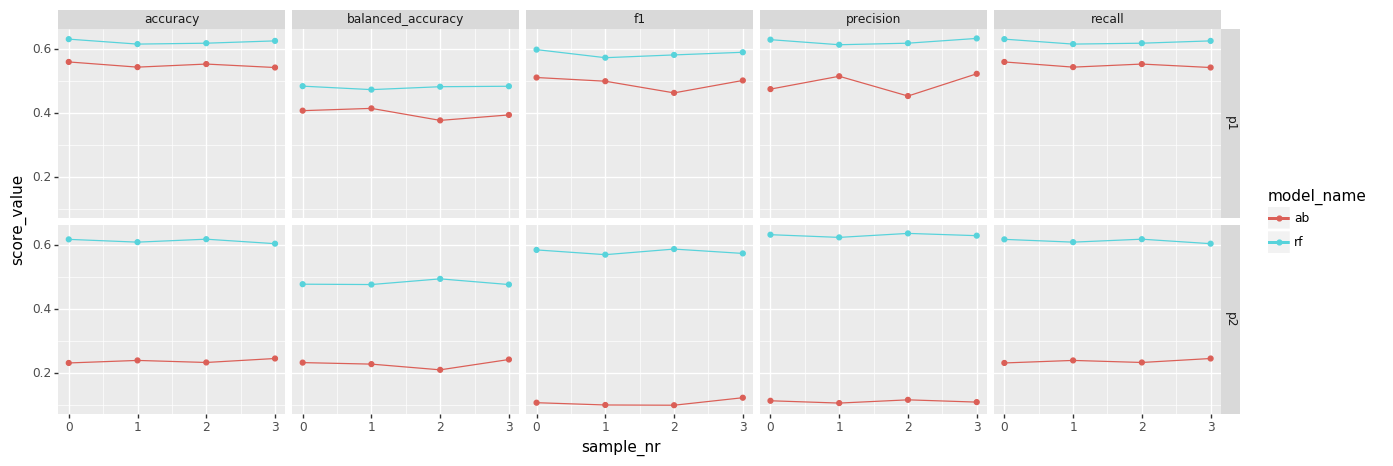

<ggplot: (193860597768)>

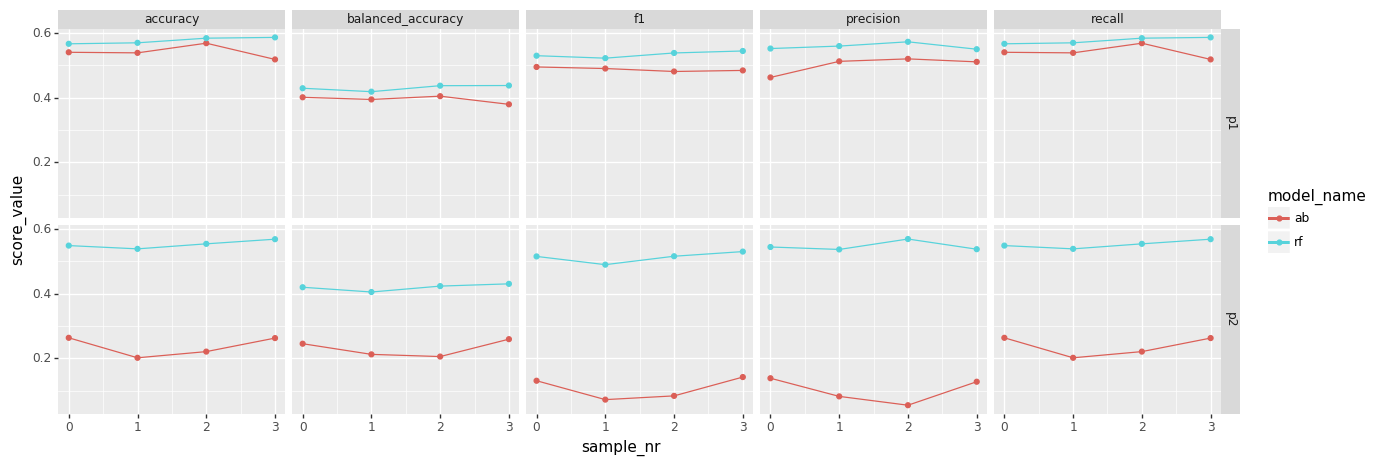

<ggplot: (193855648078)>

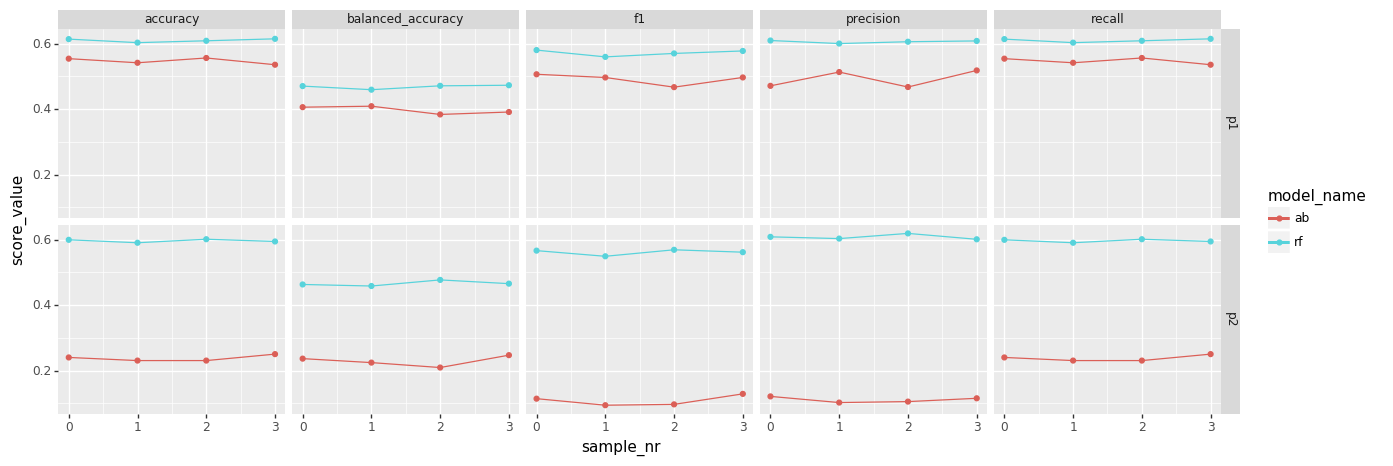

<ggplot: (193855645234)>

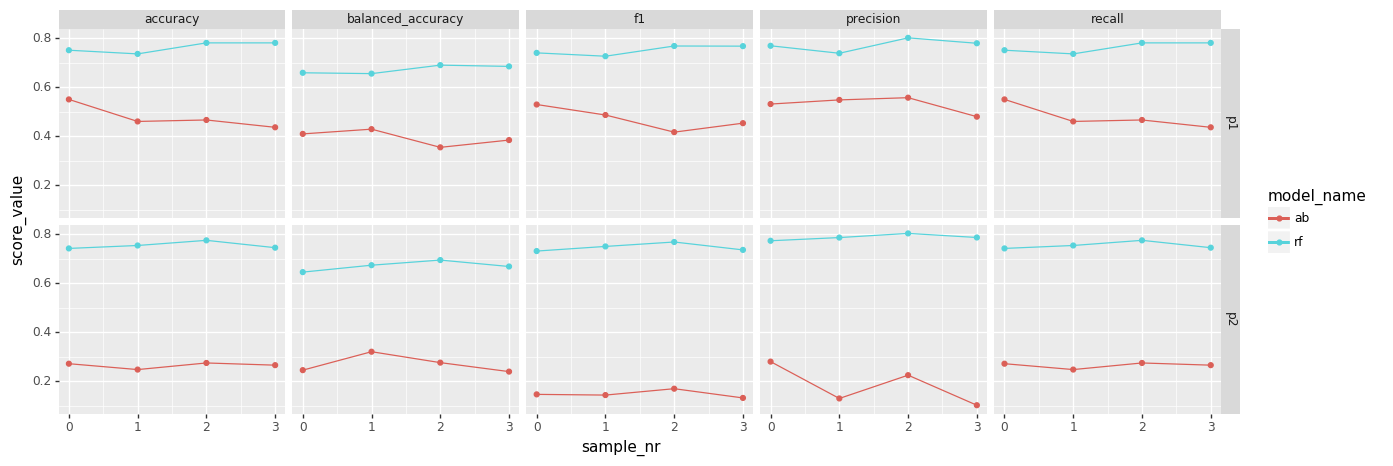

<ggplot: (-9223371842993111429)>

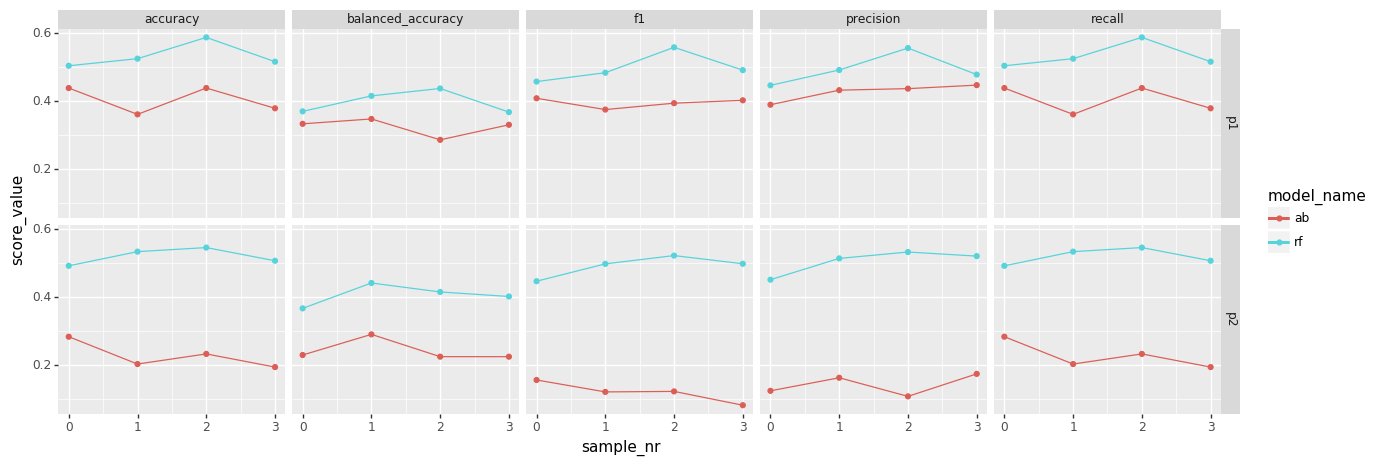

<ggplot: (-9223371842993113077)>

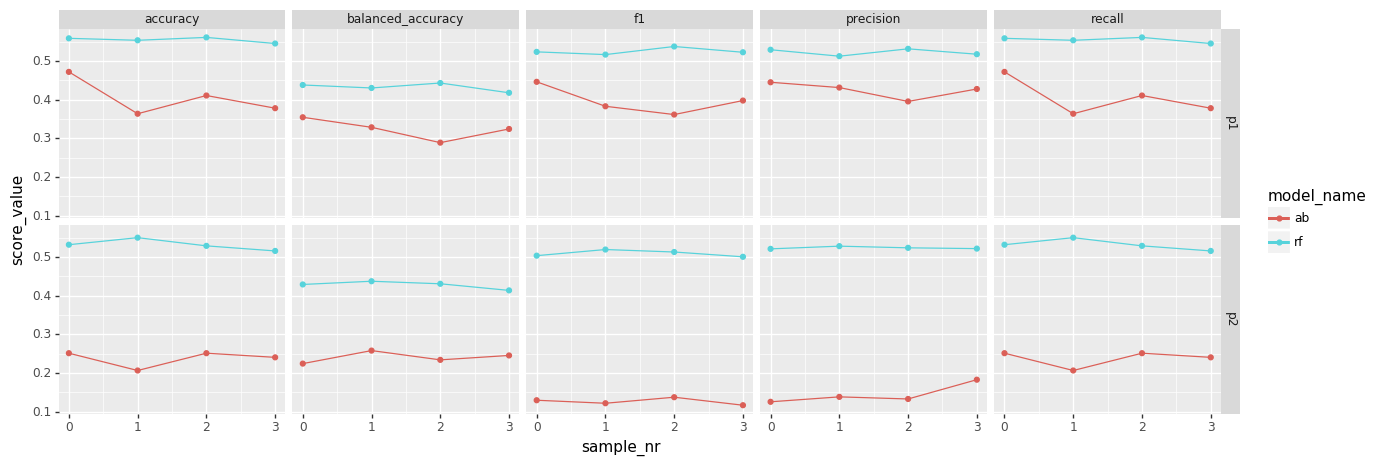

<ggplot: (193861662868)>

rf
ab


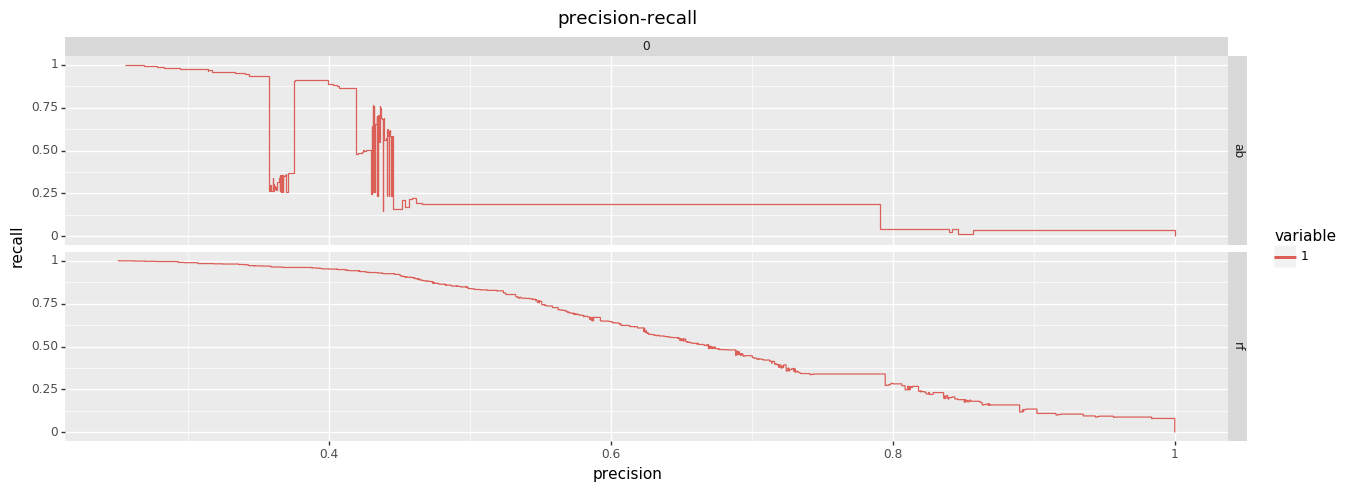

<ggplot: (-9223371842994470568)>

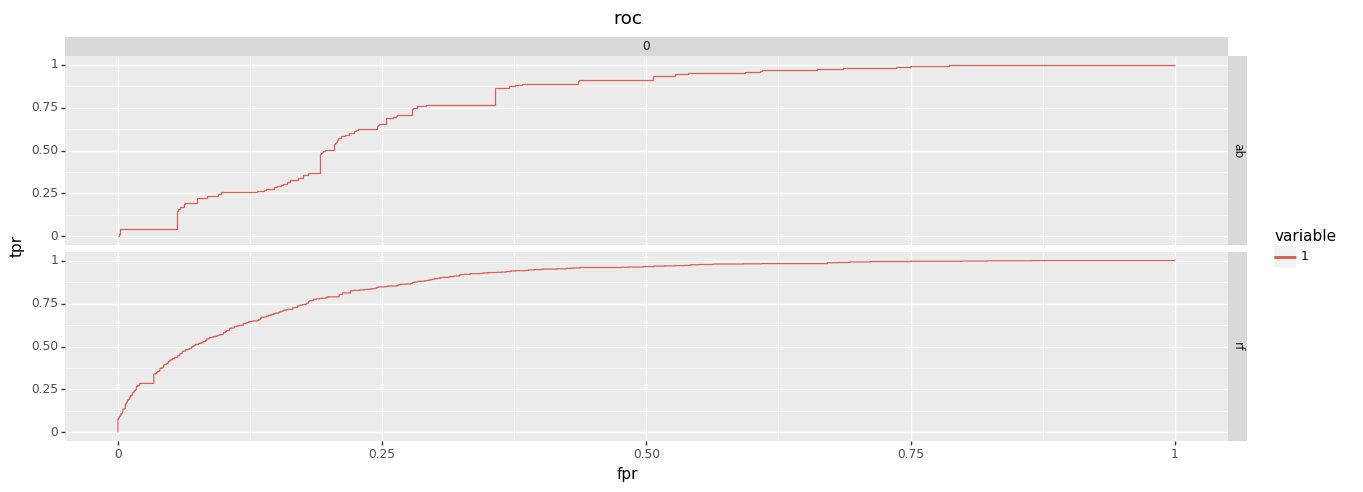

<ggplot: (193860577137)>

            average_precision
rf - 0 - 1              0.676
ab - 0 - 1              0.431
            roc_auc
rf - 0 - 1    0.877
ab - 0 - 1    0.781


rf
ab
0_m1
1_m1
0_m2
1_m2


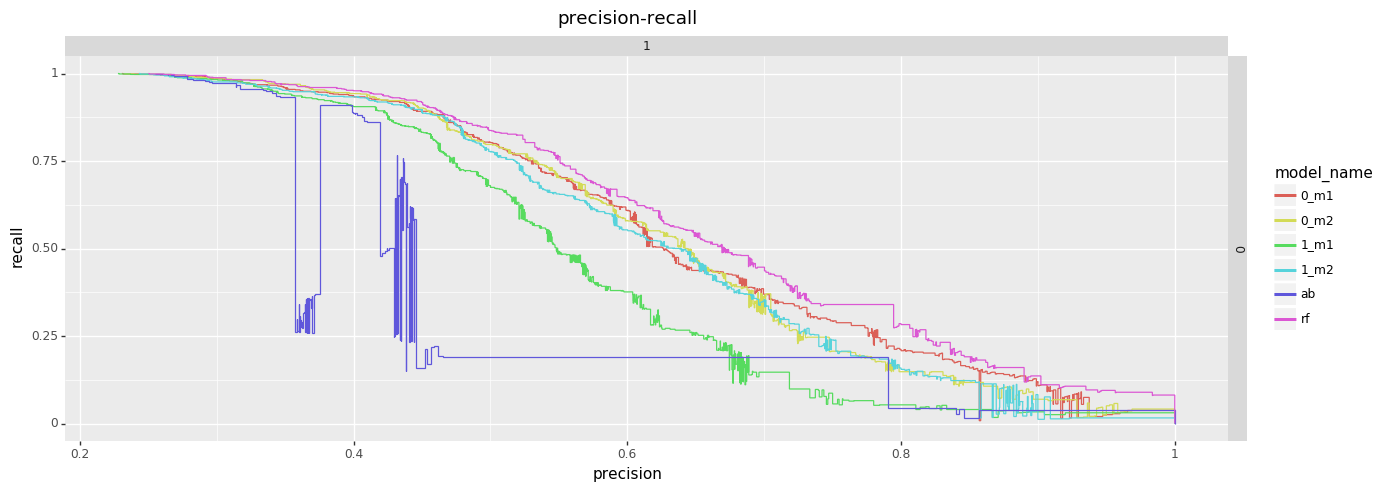

<ggplot: (193860544590)>

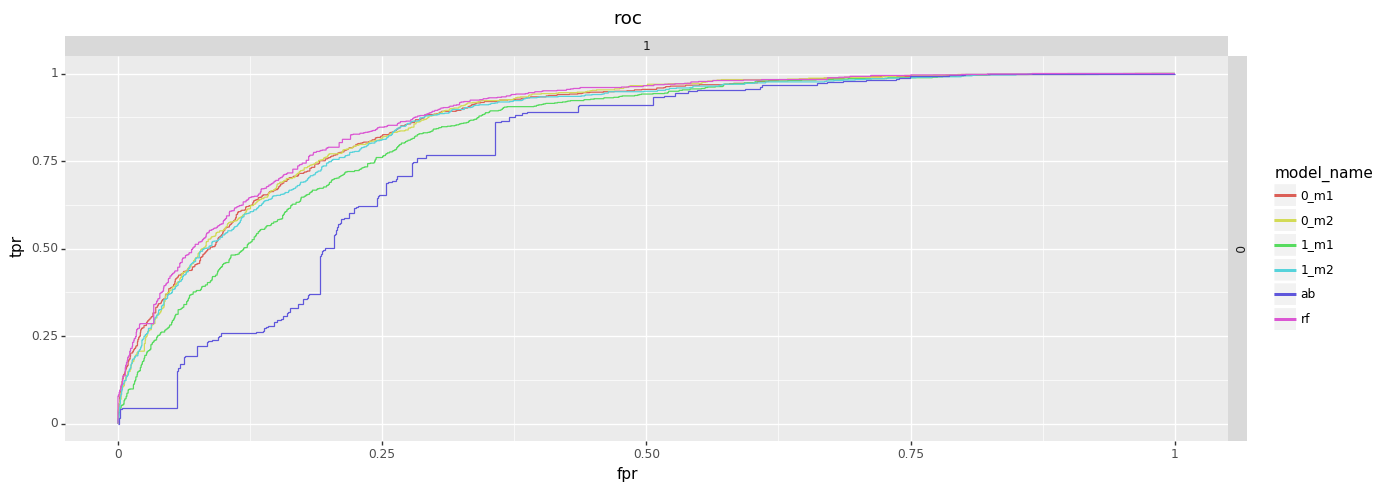

<ggplot: (-9223371842993787560)>

              average_precision
rf - 0 - 1                0.676
0_m1 - 0 - 1              0.649
0_m2 - 0 - 1              0.639
1_m2 - 0 - 1              0.630
1_m1 - 0 - 1              0.564
ab - 0 - 1                0.431
              roc_auc
rf - 0 - 1      0.877
0_m2 - 0 - 1    0.866
0_m1 - 0 - 1    0.865
1_m2 - 0 - 1    0.859
1_m1 - 0 - 1    0.835
ab - 0 - 1      0.781


In [128]:
c2.summary_big(simulation_name, pos_label, cv_n, hold_n, by_var)


# Grid search

## Obliczenia

In [ ]:
# zmienne
y_var = 'target'
x_var = ['price', 'x', 'y']


# podzial danych na train i test
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(data[x_var], data[y_var], test_size=0.33)

x_train    = x_train.reset_index(drop=True)
y_train    = y_train.reset_index(drop=True)

x_test    = x_test.reset_index(drop=True)
y_test    = y_test.reset_index(drop=True)


# konwersja zmiennej y na str
y_train = y_train.astype(str)
y_test  = y_test.astype(str)


# lista thresholdow
thresholds_list = pd.DataFrame({'0':[0.2, 0.4]})
thresholds_list['1'] = 1 - thresholds_list['0']

# lita modeli # UWAGA: lista i zakres wartosci hiterparametrow można zmienic obecnie tylko w samym kodzie funkcji !!!!
methods_list = ['RF', 'AB'] # dostepne sa: RF-random forest, AB-adata boost, GB-gradient boost, SVC-wektory nosne, NB-naive bayes, n_neighbors-KNN, XGB-xgboost, CAT-catboost, LGBM-lightgbm
priori = None

# ilosc iteracji
n_trials = 5

# positive label (tutaj jako 'int' !!! mimo że w danych jest typ 'str')
pos_label = 1

# optymalizacja
direction    = "maximize"  # czy algorytm ma minimalizowac czy maksymalizowac funkcje celu
opt_function = 'recall'    # funkcja celu (dostepne: 'recall', 'precision', 'aps' (average_recall_precision), 'balanced_accuracy', 'accuracy')



# algorytm
grid_optuna_(methods_list = methods_list
            ,direction = direction
            ,opt_function = 'recall'
            ,thresholds_list = thresholds_list
            ,pos_label = pos_label
            ,priori = None
            ,n_trials = n_trials
            ,x_train = x_train
            ,y_train = y_train
            ,x_test = x_test
            ,y_test = y_test)


['RF', 0]


[I 2020-06-14 18:33:19,141] Finished trial#0 resulted in value: 0.0. Current best value is 0.0 with parameters: {'n_estimators': 175.028943089537, 'max_depth': 2.3369144723820376, 'criterion': 'gini', 'bootstrap': True, 'class_weight': 'balanced_subsample'}.
[I 2020-06-14 18:33:25,341] Finished trial#1 resulted in value: 0.454103146286085. Current best value is 0.454103146286085 with parameters: {'n_estimators': 216.63454459402405, 'max_depth': 49.00119329889855, 'criterion': 'gini', 'bootstrap': True, 'class_weight': None}.
[I 2020-06-14 18:33:27,758] Finished trial#2 resulted in value: 0.4957833279273435. Current best value is 0.4957833279273435 with parameters: {'n_estimators': 34.253695148004674, 'max_depth': 33.08666560035198, 'criterion': 'gini', 'bootstrap': False, 'class_weight': 'balanced_subsample'}.
[I 2020-06-14 18:33:31,557] Finished trial#3 resulted in value: 0.4922153746350957. Current best value is 0.4957833279273435 with parameters: {'n_estimators': 34.253695148004674,

['RF', 1]


[I 2020-06-14 18:33:43,917] Finished trial#0 resulted in value: 0.5616282841388258. Current best value is 0.5616282841388258 with parameters: {'n_estimators': 119.02684488176214, 'max_depth': 5.914445340089955, 'criterion': 'entropy', 'bootstrap': False, 'class_weight': 'balanced'}.
[I 2020-06-14 18:33:48,442] Finished trial#1 resulted in value: 0.6221213104119364. Current best value is 0.6221213104119364 with parameters: {'n_estimators': 165.05764154722576, 'max_depth': 16.091206453687718, 'criterion': 'gini', 'bootstrap': True, 'class_weight': 'balanced'}.
[I 2020-06-14 18:33:58,431] Finished trial#2 resulted in value: 0.6104443723645799. Current best value is 0.6221213104119364 with parameters: {'n_estimators': 165.05764154722576, 'max_depth': 16.091206453687718, 'criterion': 'gini', 'bootstrap': True, 'class_weight': 'balanced'}.
[I 2020-06-14 18:34:07,166] Finished trial#3 resulted in value: 0.5857930587090496. Current best value is 0.6221213104119364 with parameters: {'n_estimato

['AB', 0]


[I 2020-06-14 18:34:13,609] Finished trial#0 resulted in value: 0.0. Current best value is 0.0 with parameters: {'n_estimators': 26.4886794695483, 'learning_rate': 0.28872262986233455, 'algorithm': 'SAMME'}.
[I 2020-06-14 18:34:23,367] Finished trial#1 resulted in value: 0.0. Current best value is 0.0 with parameters: {'n_estimators': 26.4886794695483, 'learning_rate': 0.28872262986233455, 'algorithm': 'SAMME'}.
[I 2020-06-14 18:34:27,616] Finished trial#2 resulted in value: 0.0. Current best value is 0.0 with parameters: {'n_estimators': 26.4886794695483, 'learning_rate': 0.28872262986233455, 'algorithm': 'SAMME'}.


## Wizualizacja

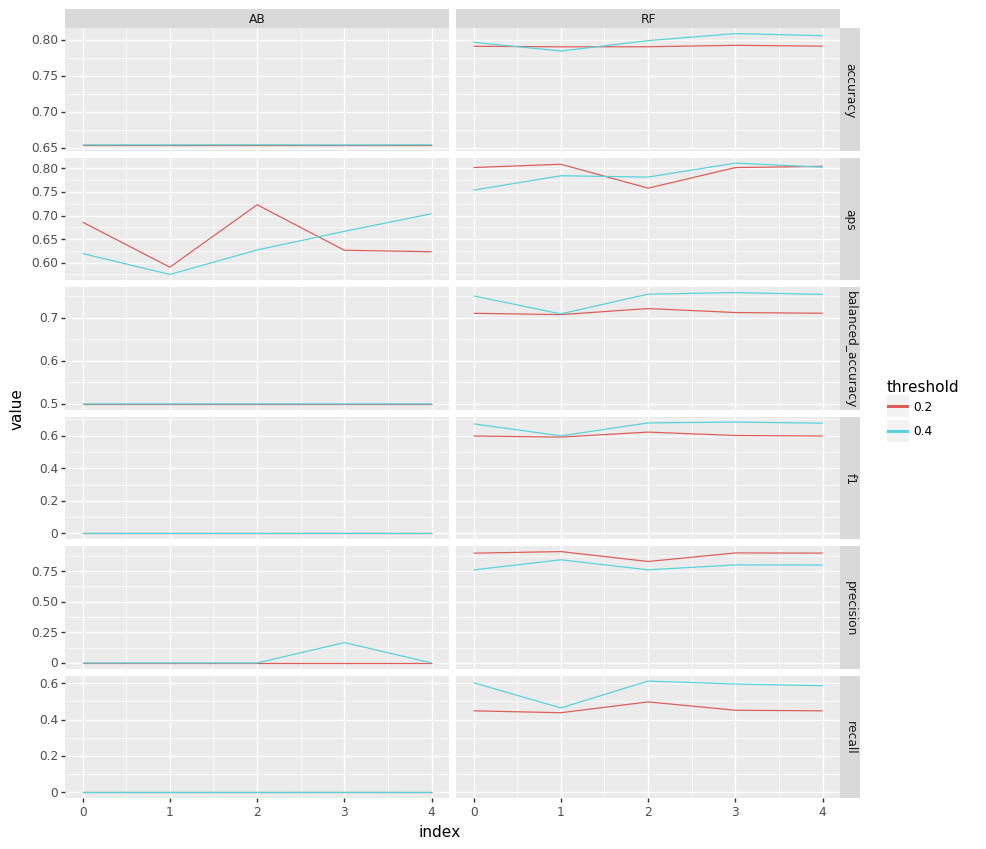

<ggplot: (-9223371871201126940)>


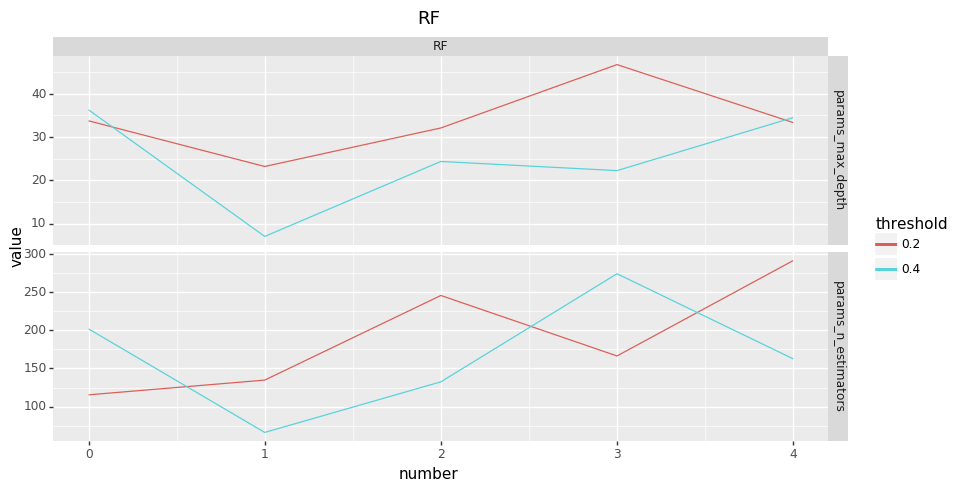

<ggplot: (-9223371871172850337)>
('AB', 0.2)


params_algorithm params_learning_rate params_n_estimators  \
0          SAMME.R               0.0908                 296   
1            SAMME               0.0964                 245   
2          SAMME.R                0.199                 240   
3            SAMME                0.226                 236   
4          SAMME.R               0.0576                 207   

  system_attrs__number  value  
0                    0    0.0  
1                    1    0.0  
2                    2    0.0  
3                    3    0.0  
4                    4    0.0

('AB', 0.4)


params_algorithm params_learning_rate params_n_estimators  \
3            SAMME                0.283                 276   
0            SAMME                0.187                 223   
1            SAMME                0.167                 107   
2          SAMME.R                0.224                58.6   
4          SAMME.R                0.207                 171   

  system_attrs__number      value  
3                    3  1.623e-04  
0                    0  0.000e+00  
1                    1  0.000e+00  
2                    2  0.000e+00  
4                    4  0.000e+00

('RF', 0.2)


params_bootstrap params_class_weight params_criterion params_max_depth  \
2            False                None             gini             32.1   
3             True                None             gini             46.8   
0             True                None             gini             33.8   
4             True            balanced          entropy             33.4   
1             True                None          entropy             23.2   

  params_n_estimators system_attrs__number  value  
2                 246                    2  0.497  
3                 166                    3  0.451  
0                 115                    0  0.448  
4                 291                    4  0.448  
1                 135                    1  0.437

('RF', 0.4)


params_bootstrap params_class_weight params_criterion params_max_depth  \
2            False            balanced             gini             24.4   
0            False                None          entropy             36.3   
3             True            balanced          entropy             22.3   
4             True                None             gini             34.5   
1             True                None             gini             7.04   

  params_n_estimators system_attrs__number  value  
2                 132                    2  0.611  
0                 202                    0  0.602  
3                 274                    3  0.595  
4                 163                    4  0.585  
1                66.1                    1  0.464

In [283]:
# wykres parametrow oceniajacych dopasownaie po modelach i punktach odciecia
grid_optuna_scores_plot(trial_scores, fig_w = 10, fig_h = 10)


# wykres wartosci KONRETNYCH hipermatametrow dla KONRETNEGO modelu po roznych punktach odciecia
grid_optuna_hyperparameters_plot(trial_hyperparameters, params_to_print = ['n_estimators', 'max_depth'], method = 'RF')


# tabele z wartosciami hiperparametrow (w kolumnie 'value' jest funkcja celu)    
grid_optuna_hyperparameters_tables(trial_hyperparameters)